In [5]:
pip install -r ../requirements.txt --break-system-packages

ERROR: Could not open requirements file: [Errno 2] No such file or directory: '../requirements.txt'
Note: you may need to restart the kernel to use updated packages.


## 1. Bibliotheken importieren und Daten laden

Erläuterung: Hier laden wir alle notwendigen Bibliotheken für die Analyse und Visualisierung sowie den Datensatz selbst.

In [6]:
# Import helpful packages
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from scipy import stats
import missingno as msno
# from sklearn.decomposition import PCA
#from sklearn.preprocessing import StandardScaler


# Matplotlib setting for Jupyter Notebook
%matplotlib inline

In [8]:

sns.set(color_codes=True)
plt.style.use('ggplot')

# Configuration
input = "/Users/tobiaswachtel/Documents/GitHub/Data_Mining_WB_DBU/"
INPUT_FILE = os.path.join(input, "hotel_bookings.csv")
PROFILE_FILE = os.path.join(input, "hotel_bookings.html")
CREATE_PROFILE = True

df_raw = pd.read_csv(INPUT_FILE, encoding='latin1')

## 2. Übersicht und grundlegende Informationen

Erläuterung: Diese Schritte geben einen ersten Überblick über den Datensatz, seine Struktur, Datentypen und grundlegende statistische Kennzahlen.

In [9]:
df = df_raw


# Erste und letzte Zeilen anzeigen
print("Erste 5 Zeilen des Datensatzes:")
display(df.head())
print("\nLetzte 5 Zeilen des Datensatzes:")
display(df.tail())

# Grundlegende Informationen
print("\nGrundlegende Informationen:")
display(df.info())

# Datentypen identifizieren
print("\nDatentypen pro Spalte:")
display(df.dtypes.value_counts())
print("\nListe aller Spalten mit ihren Datentypen:")
display(df.dtypes)

# Separate Listen für numerische und kategoriale Spalten erstellen
numeric_columns = df.select_dtypes(include=['number']).columns.tolist()
categorical_columns = df.select_dtypes(exclude=['number']).columns.tolist()

print(f"\nNumerische Spalten ({len(numeric_columns)}): {numeric_columns}")
print(f"Kategoriale Spalten ({len(categorical_columns)}): {categorical_columns}")

# Größe des Datensatzes
print(f"\nDatensatzgröße: {df.shape[0]} Zeilen und {df.shape[1]} Spalten")



Erste 5 Zeilen des Datensatzes:


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03



Letzte 5 Zeilen des Datensatzes:


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07
119389,City Hotel,0,205,2017,August,35,29,2,7,2,...,No Deposit,9.0,NaN,0,Transient,151.20,0,2,Check-Out,2017-09-07



Grundlegende Informationen:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  

None


Datentypen pro Spalte:


int64      16
object     12
float64     4
Name: count, dtype: int64


Liste aller Spalten mit ihren Datentypen:


hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                             


Numerische Spalten (20): ['is_canceled', 'lead_time', 'arrival_date_year', 'arrival_date_week_number', 'arrival_date_day_of_month', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children', 'babies', 'is_repeated_guest', 'previous_cancellations', 'previous_bookings_not_canceled', 'booking_changes', 'agent', 'company', 'days_in_waiting_list', 'adr', 'required_car_parking_spaces', 'total_of_special_requests']
Kategoriale Spalten (12): ['hotel', 'arrival_date_month', 'meal', 'country', 'market_segment', 'distribution_channel', 'reserved_room_type', 'assigned_room_type', 'deposit_type', 'customer_type', 'reservation_status', 'reservation_status_date']

Datensatzgröße: 119390 Zeilen und 32 Spalten


## 3. Prüfung auf fehlende Werte

Erläuterung: Hier identifizieren wir fehlende Werte im Datensatz und visualisieren deren Muster.

Fehlende Werte pro Spalte:


,Fehlende Werte,Prozent (%)
company,112593,94.306893
agent,16340,13.686238
country,488,0.408744
children,4,0.003350


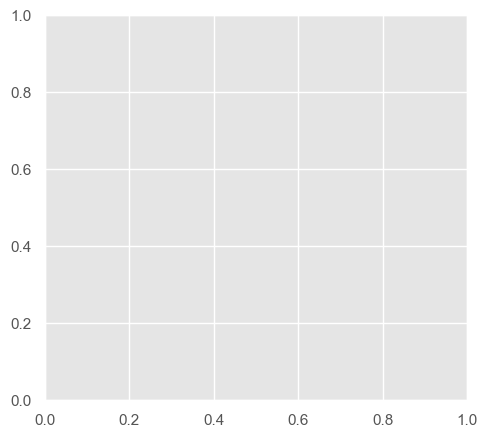

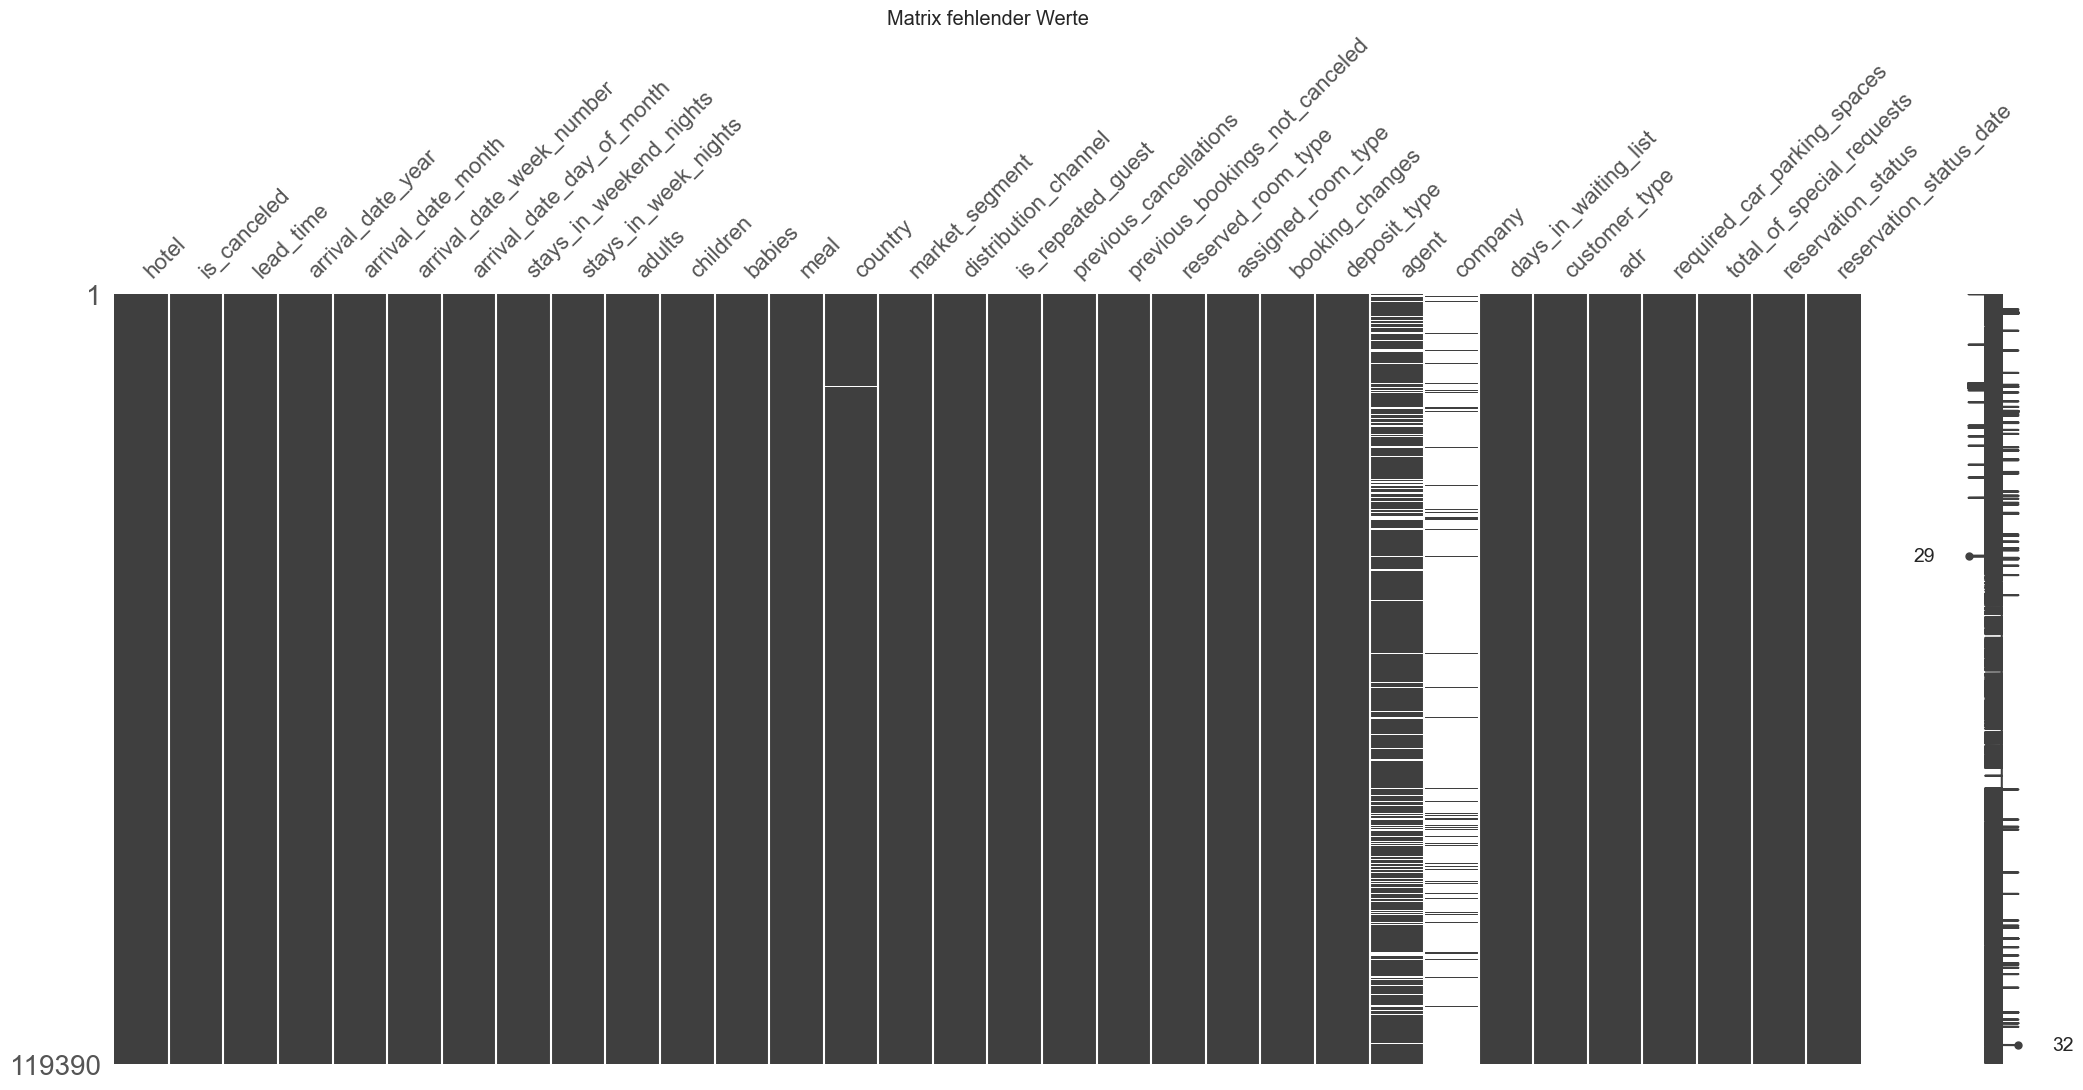

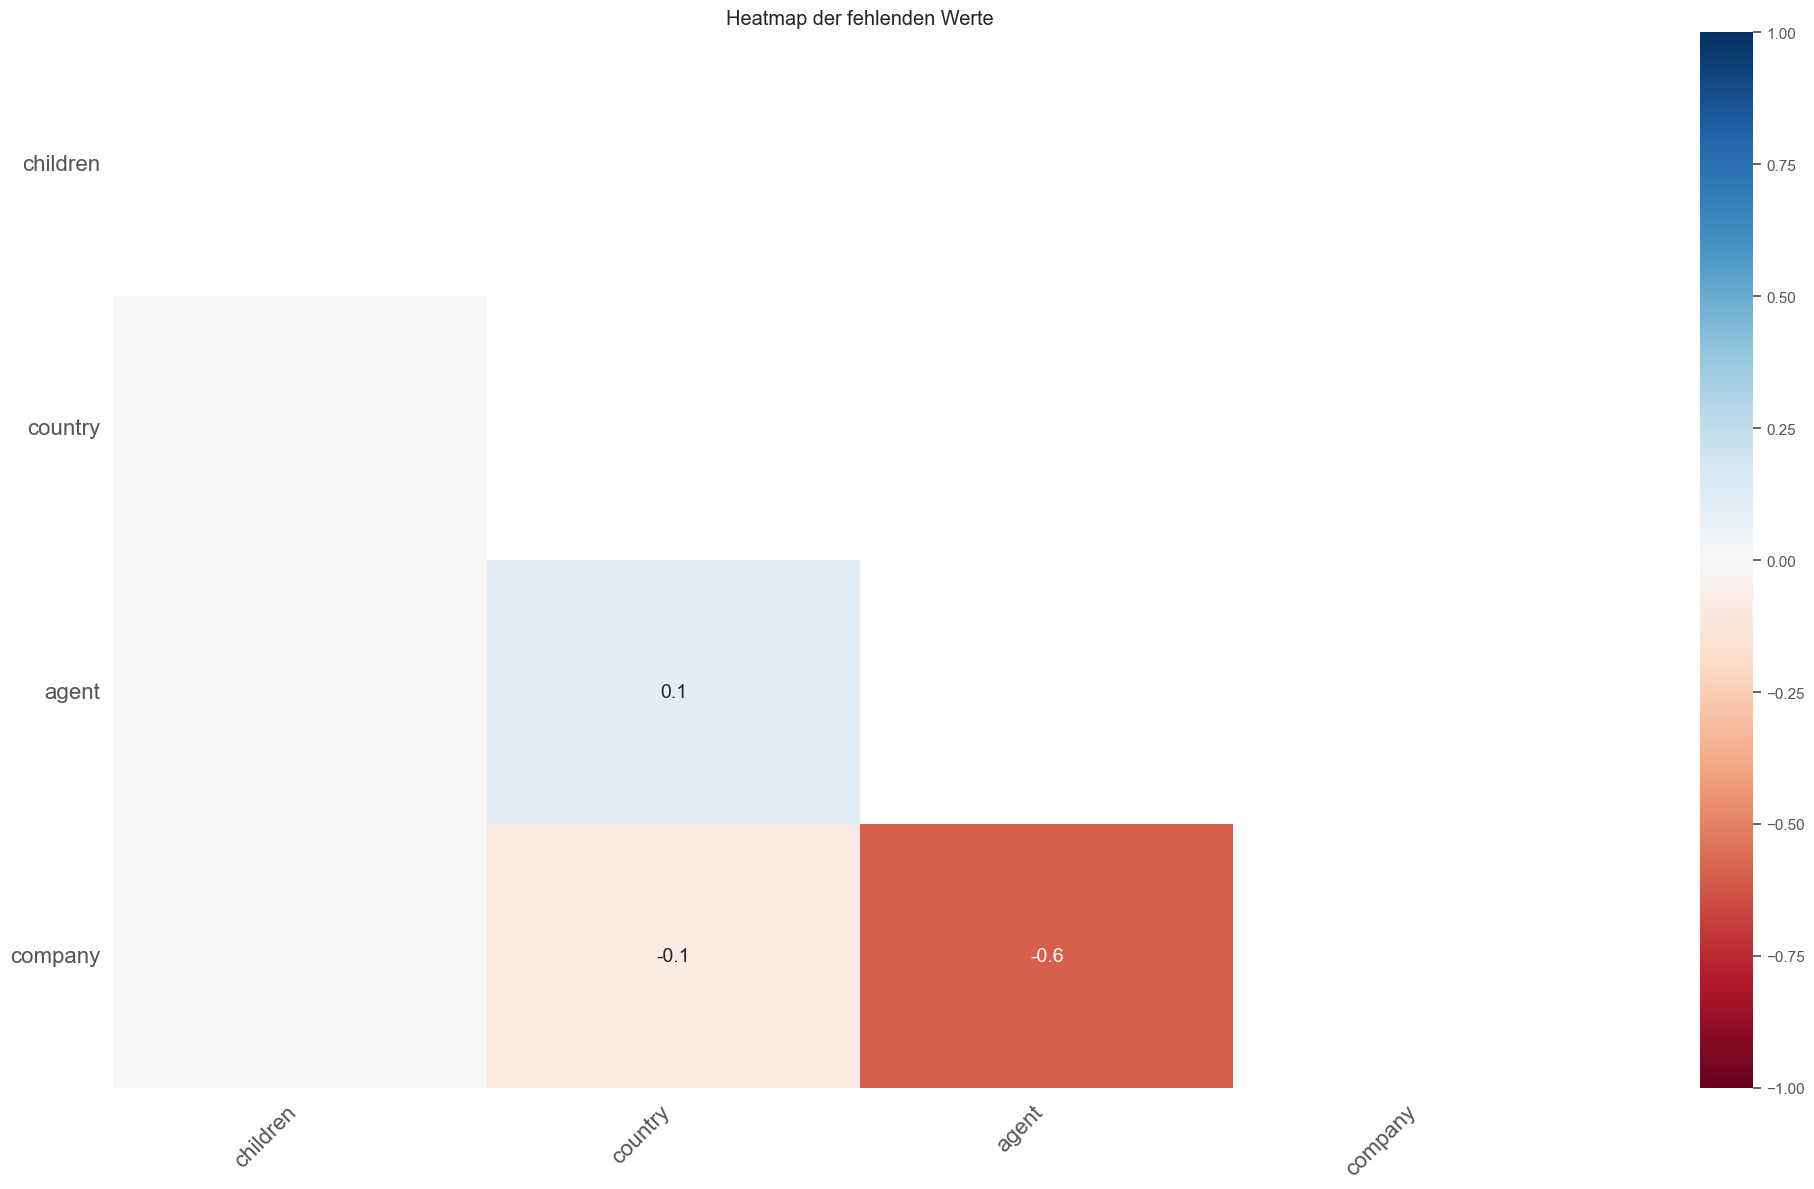

<Figure size 1200x600 with 0 Axes>

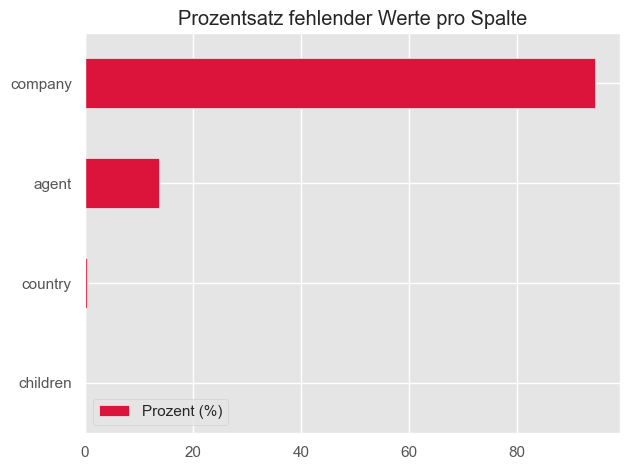

<Figure size 1000x800 with 0 Axes>

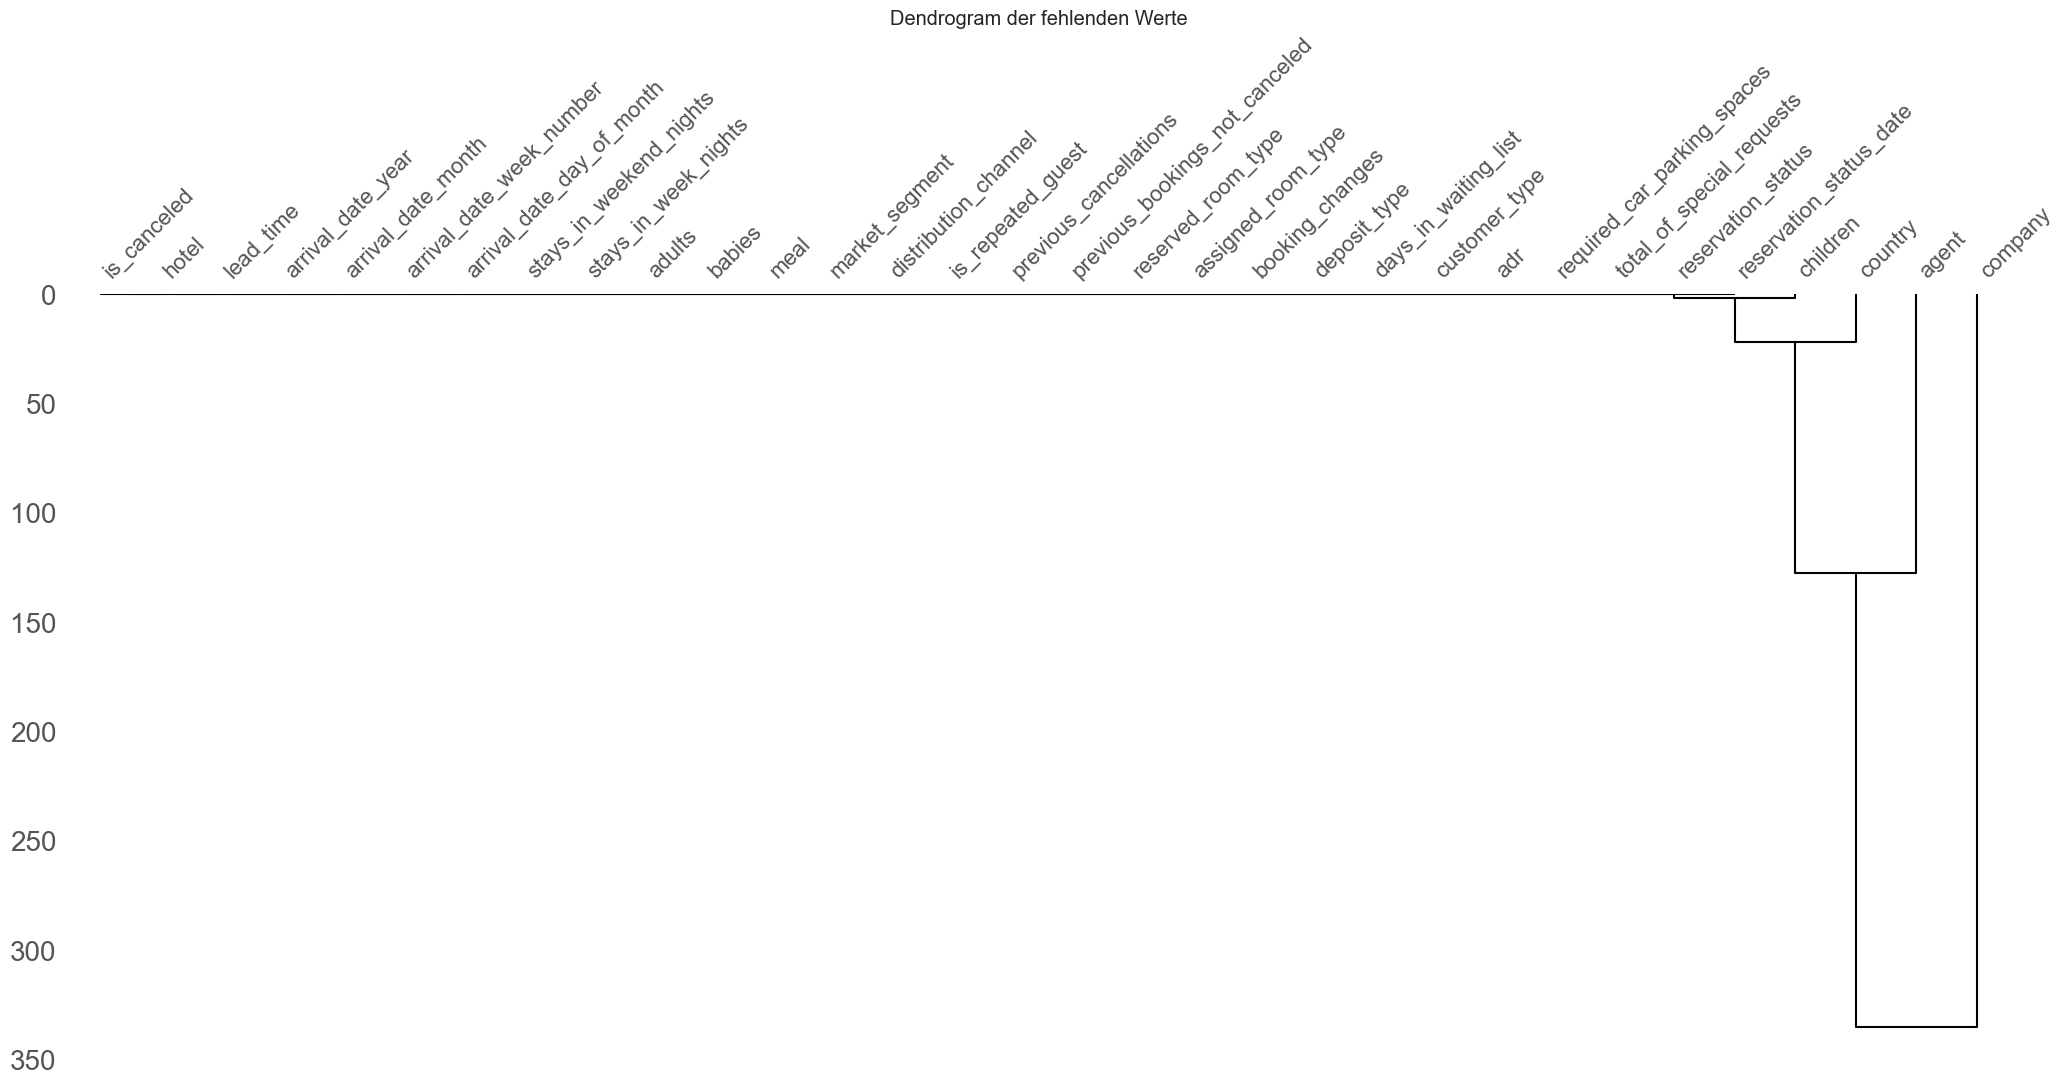

In [10]:
# Anzahl und Prozentsatz fehlender Werte pro Spalte
missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100
missing_info = pd.DataFrame({
    'Fehlende Werte': missing_values,
    'Prozent (%)': missing_percentage
})
missing_info = missing_info[missing_info['Fehlende Werte'] > 0].sort_values('Prozent (%)', ascending=False)

print("Fehlende Werte pro Spalte:")
if len(missing_info) > 0:
    display(missing_info)
else:
    print("Keine fehlenden Werte gefunden")

# Visualisierung fehlender Werte mit verschiedenen Plots
if missing_values.sum() > 0:
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    msno.matrix(df)
    plt.title('Matrix fehlender Werte')
    
    plt.subplot(1, 2, 2)
    msno.heatmap(df)
    plt.title('Heatmap der fehlenden Werte')
    plt.tight_layout()
    plt.show()
    
    # Bar-Plot für fehlende Werte
    plt.figure(figsize=(12, 6))
    missing_info.sort_values('Fehlende Werte').plot(
        kind='barh', y='Prozent (%)', 
        color='crimson', 
        title='Prozentsatz fehlender Werte pro Spalte'
    )
    plt.tight_layout()
    plt.show()
    
    # Zusammenhang zwischen fehlenden Werten visualisieren
    plt.figure(figsize=(10, 8))
    msno.dendrogram(df)
    plt.title('Dendrogram der fehlenden Werte')
    plt.show()

## 4. Univariate Analyse - Verteilungen einzelner Variablen

Erläuterung: Diese Visualisierungen zeigen die Verteilungen jeder einzelnen Variable. Histogramme zeigen die Form der Verteilung, Boxplots identifizieren Ausreißer, und QQ-Plots prüfen auf Normalverteilung.


Statistische Zusammenfassung numerischer Spalten:


,count,mean,std,min,25%,50%,75%,max
is_canceled,119390.0,0.370416,0.482918,0.00,0.00,0.000,1.0,1.0
lead_time,119390.0,104.011416,106.863097,0.00,18.00,69.000,160.0,737.0
arrival_date_year,119390.0,2016.156554,0.707476,2015.00,2016.00,2016.000,2017.0,2017.0
arrival_date_week_number,119390.0,27.165173,13.605138,1.00,16.00,28.000,38.0,53.0
arrival_date_day_of_month,119390.0,15.798241,8.780829,1.00,8.00,16.000,23.0,31.0
stays_in_weekend_nights,119390.0,0.927599,0.998613,0.00,0.00,1.000,2.0,19.0
stays_in_week_nights,119390.0,2.500302,1.908286,0.00,1.00,2.000,3.0,50.0
adults,119390.0,1.856403,0.579261,0.00,2.00,2.000,2.0,55.0
children,119386.0,0.103890,0.398561,0.00,0.00,0.000,0.0,10.0
babies,119390.0,0.007949,0.097436,0.00,0.00,0.000,0.0,10.0



Häufigkeitsverteilungen kategorialer Spalten:

hotel:


hotel
City Hotel      79330
Resort Hotel    40060
Name: count, dtype: int64

Anzahl eindeutiger Werte: 2

arrival_date_month:


arrival_date_month
August       13877
July         12661
May          11791
October      11160
April        11089
June         10939
September    10508
March         9794
February      8068
November      6794
Name: count, dtype: int64

Anzahl eindeutiger Werte: 12

meal:


meal
BB           92310
HB           14463
SC           10650
Undefined     1169
FB             798
Name: count, dtype: int64

Anzahl eindeutiger Werte: 5

country:


country
PRT    48590
GBR    12129
FRA    10415
ESP     8568
DEU     7287
ITA     3766
IRL     3375
BEL     2342
BRA     2224
NLD     2104
Name: count, dtype: int64

Anzahl eindeutiger Werte: 177

market_segment:


market_segment
Online TA        56477
Offline TA/TO    24219
Groups           19811
Direct           12606
Corporate         5295
Complementary      743
Aviation           237
Undefined            2
Name: count, dtype: int64

Anzahl eindeutiger Werte: 8

distribution_channel:


distribution_channel
TA/TO        97870
Direct       14645
Corporate     6677
GDS            193
Undefined        5
Name: count, dtype: int64

Anzahl eindeutiger Werte: 5

reserved_room_type:


reserved_room_type
A    85994
D    19201
E     6535
F     2897
G     2094
B     1118
C      932
H      601
P       12
L        6
Name: count, dtype: int64

Anzahl eindeutiger Werte: 10

assigned_room_type:


assigned_room_type
A    74053
D    25322
E     7806
F     3751
G     2553
C     2375
B     2163
H      712
I      363
K      279
Name: count, dtype: int64

Anzahl eindeutiger Werte: 12

deposit_type:


deposit_type
No Deposit    104641
Non Refund     14587
Refundable       162
Name: count, dtype: int64

Anzahl eindeutiger Werte: 3

customer_type:


customer_type
Transient          89613
Transient-Party    25124
Contract            4076
Group                577
Name: count, dtype: int64

Anzahl eindeutiger Werte: 4

reservation_status:


reservation_status
Check-Out    75166
Canceled     43017
No-Show       1207
Name: count, dtype: int64

Anzahl eindeutiger Werte: 3

reservation_status_date:


reservation_status_date
2015-10-21    1461
2015-07-06     805
2016-11-25     790
2015-01-01     763
2016-01-18     625
2015-07-02     469
2016-12-07     450
2015-12-18     423
2016-02-09     412
2016-04-04     382
Name: count, dtype: int64

Anzahl eindeutiger Werte: 926


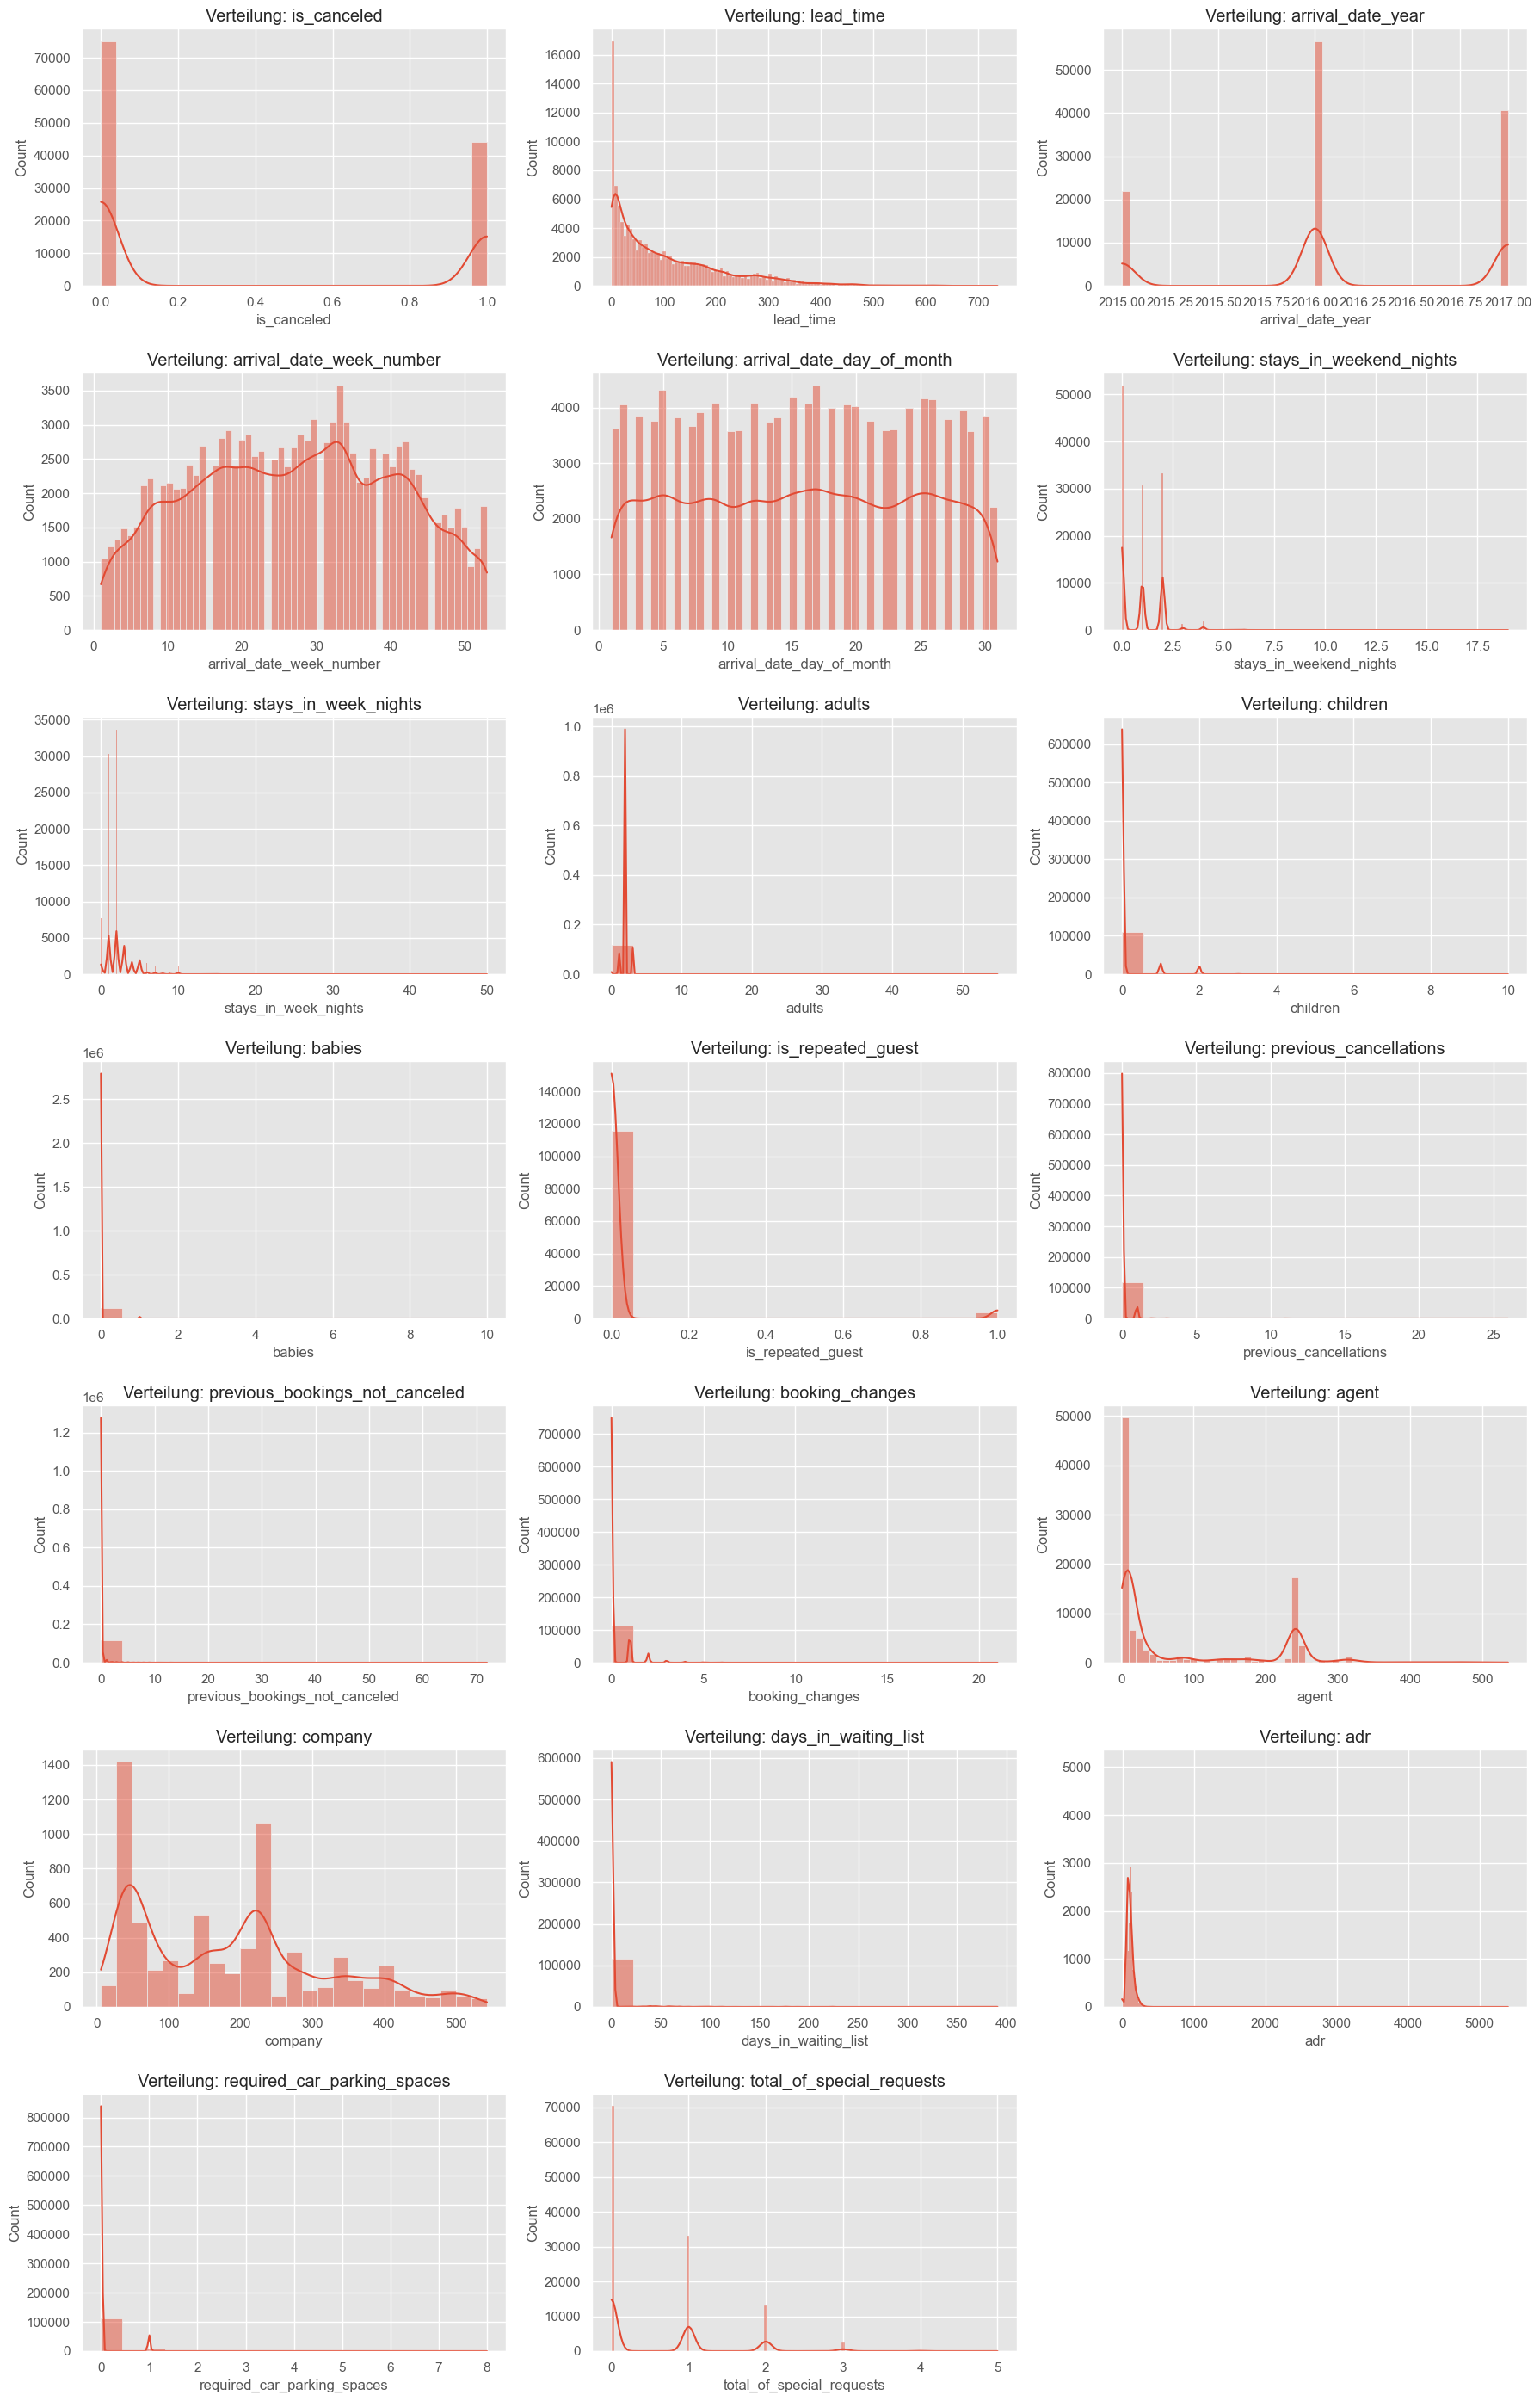

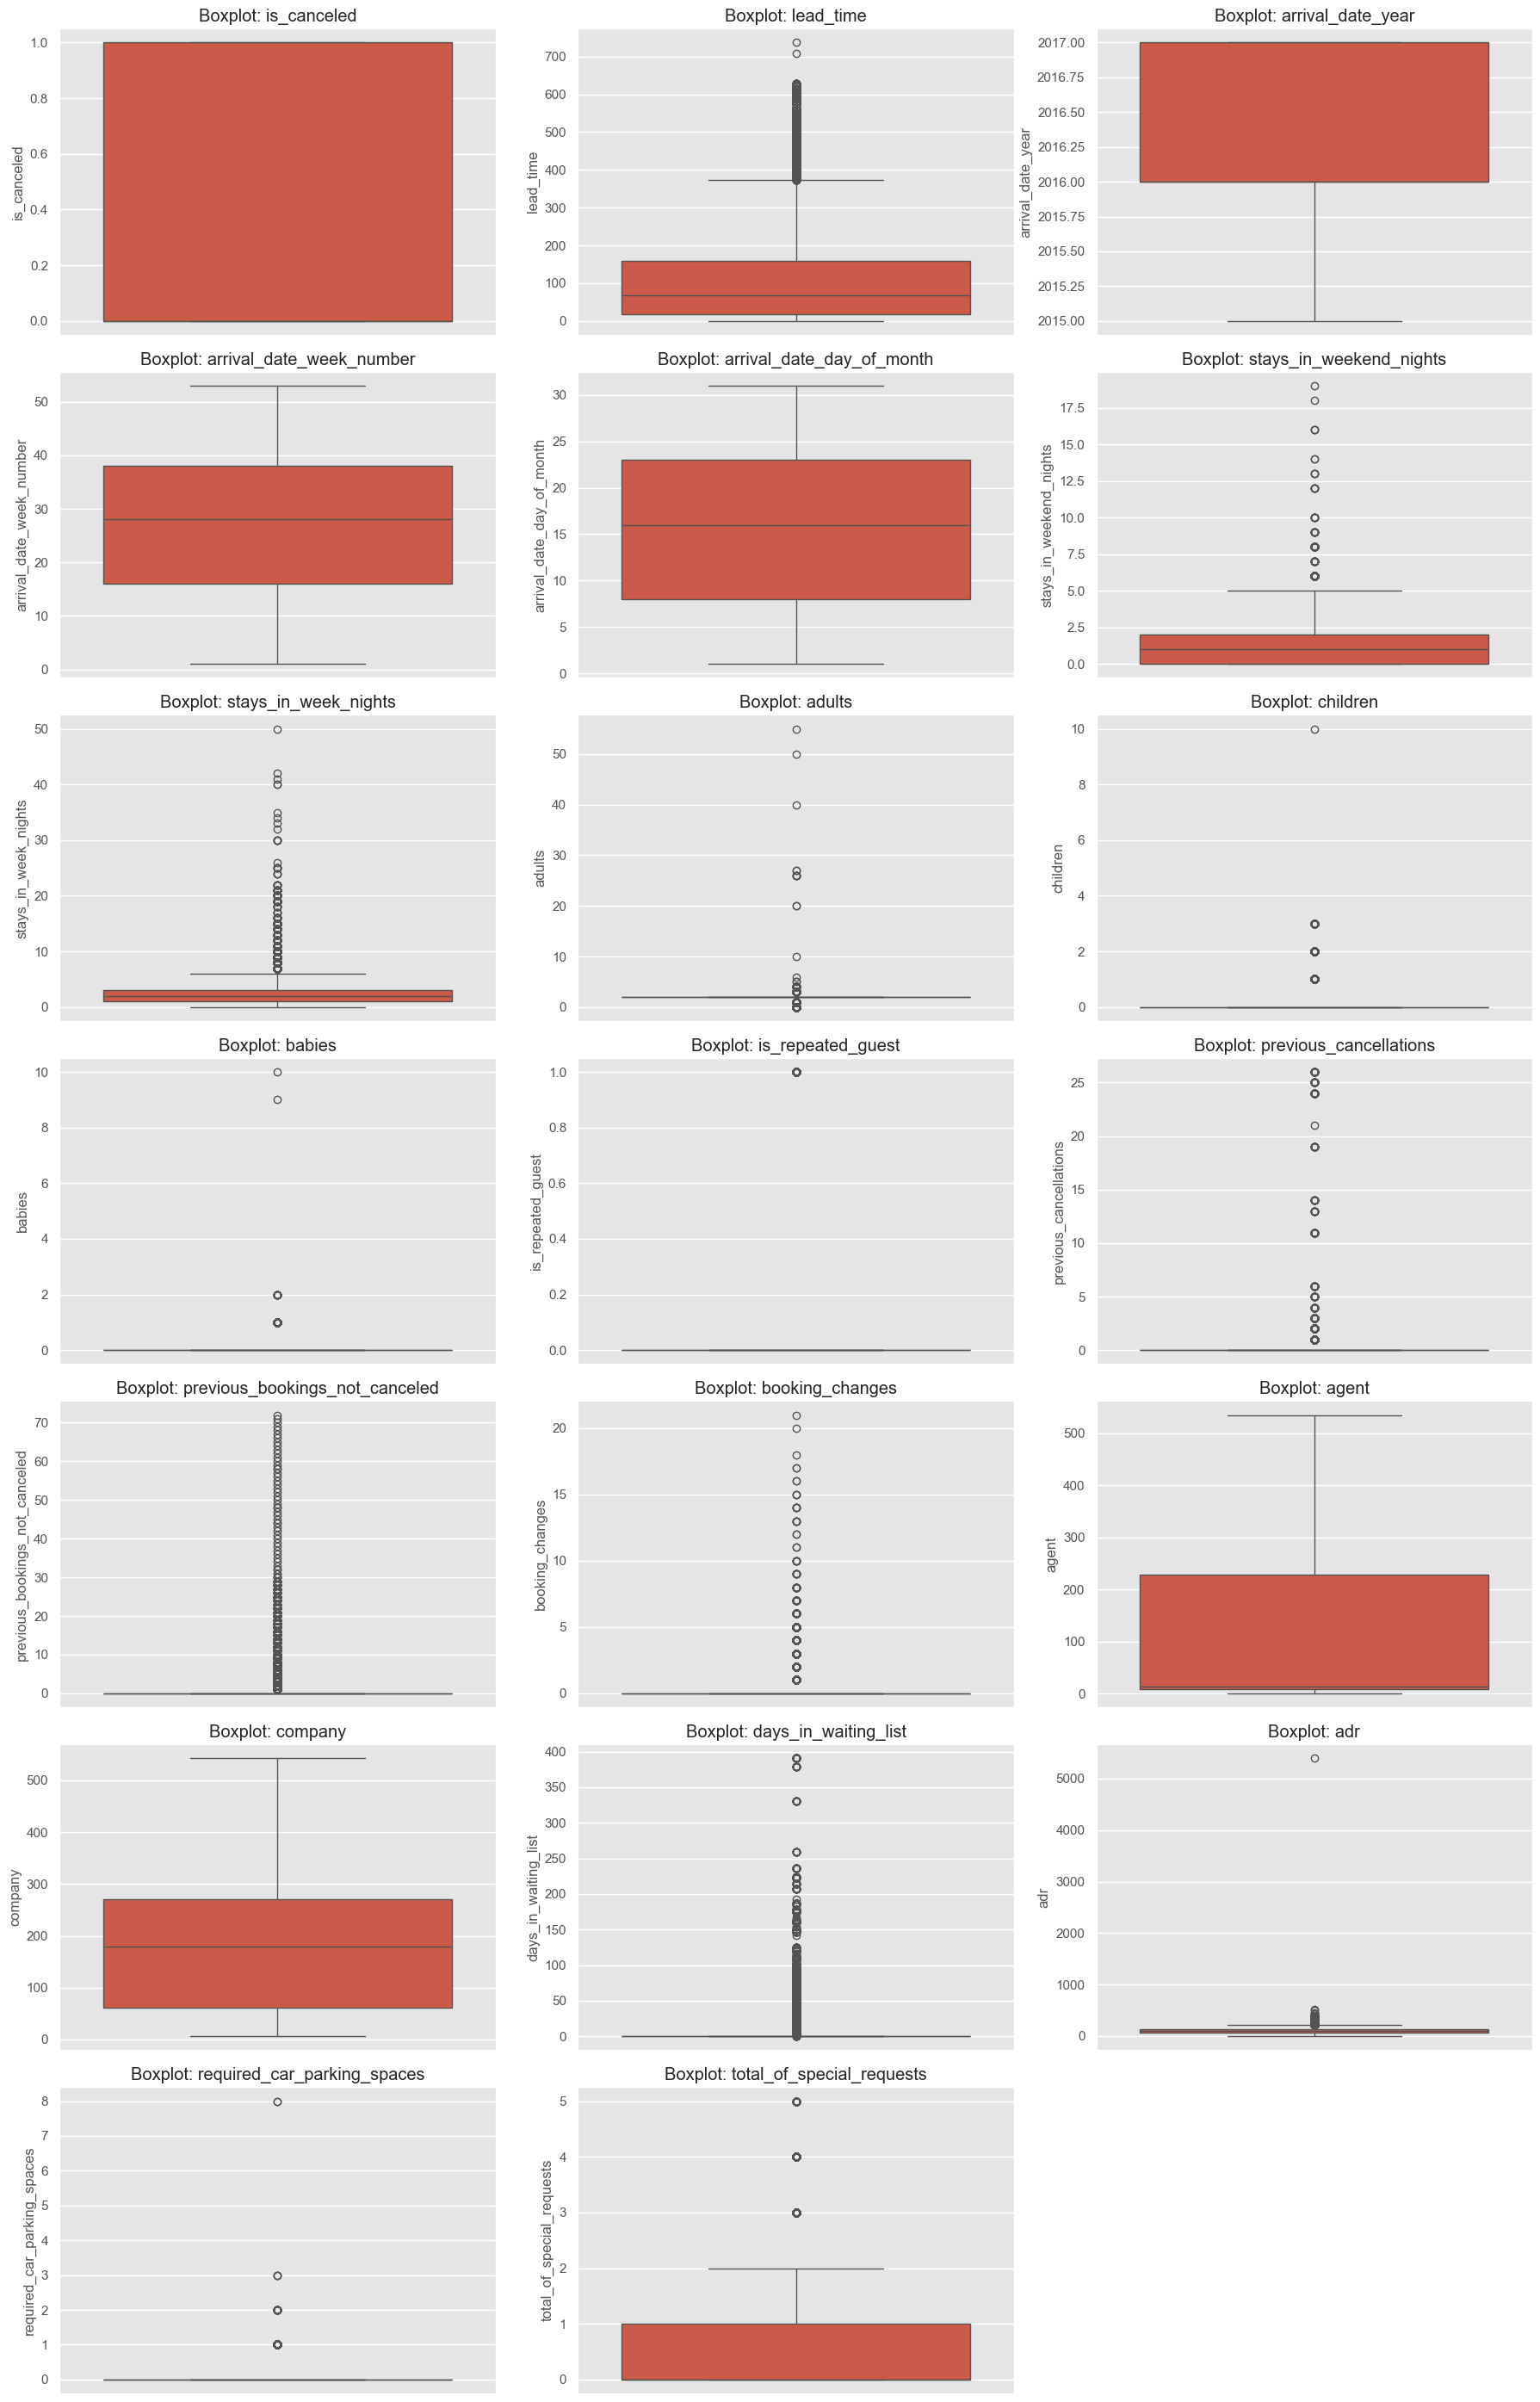

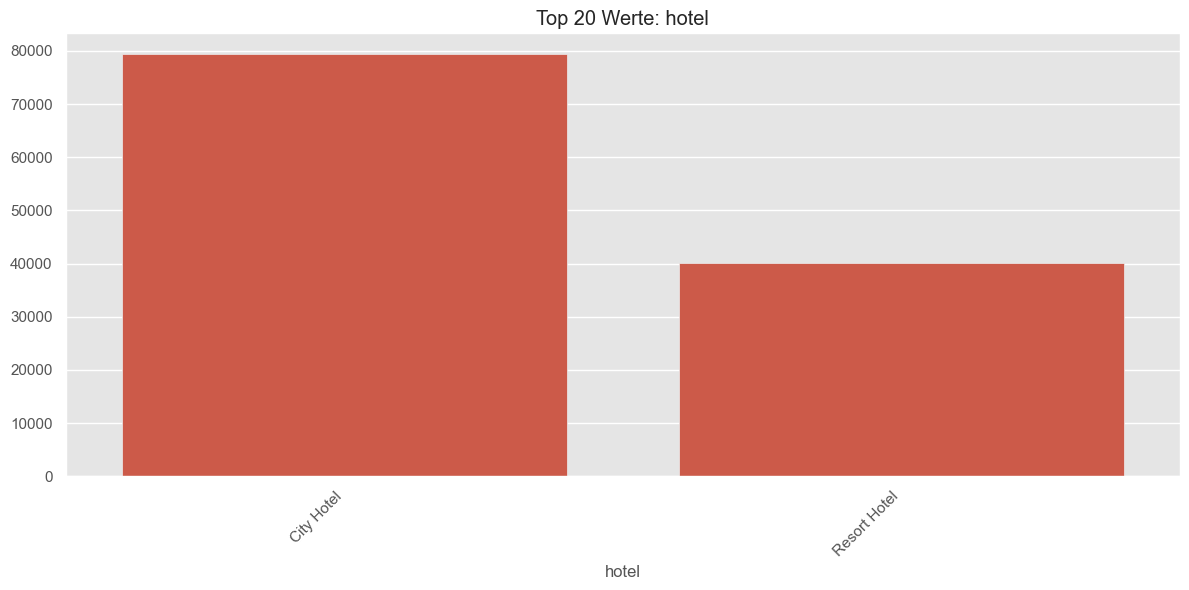

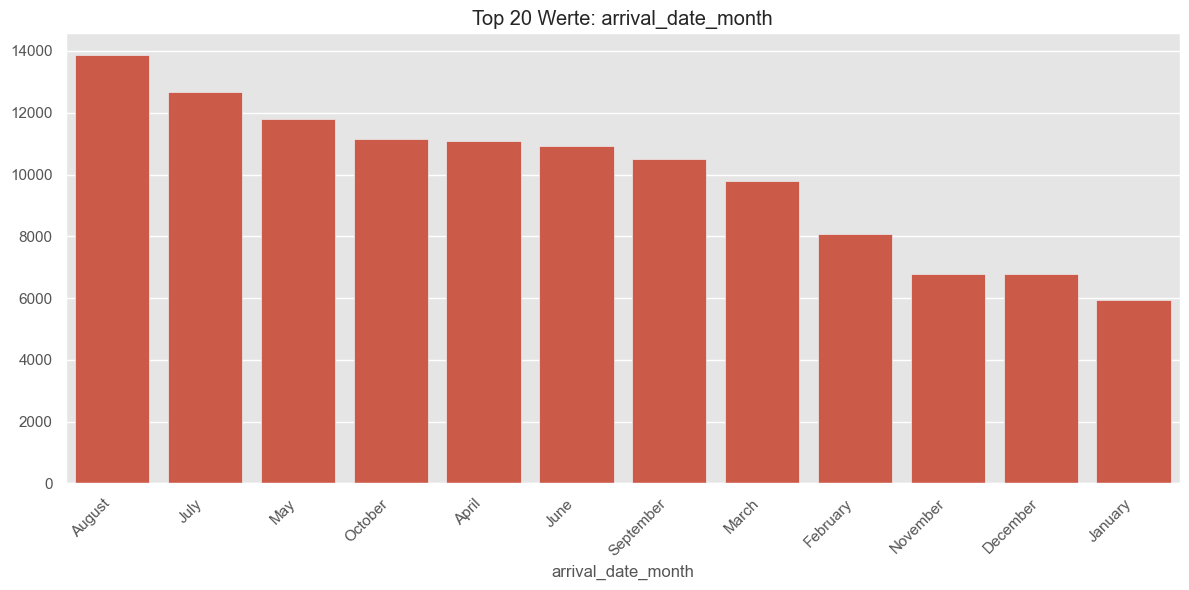

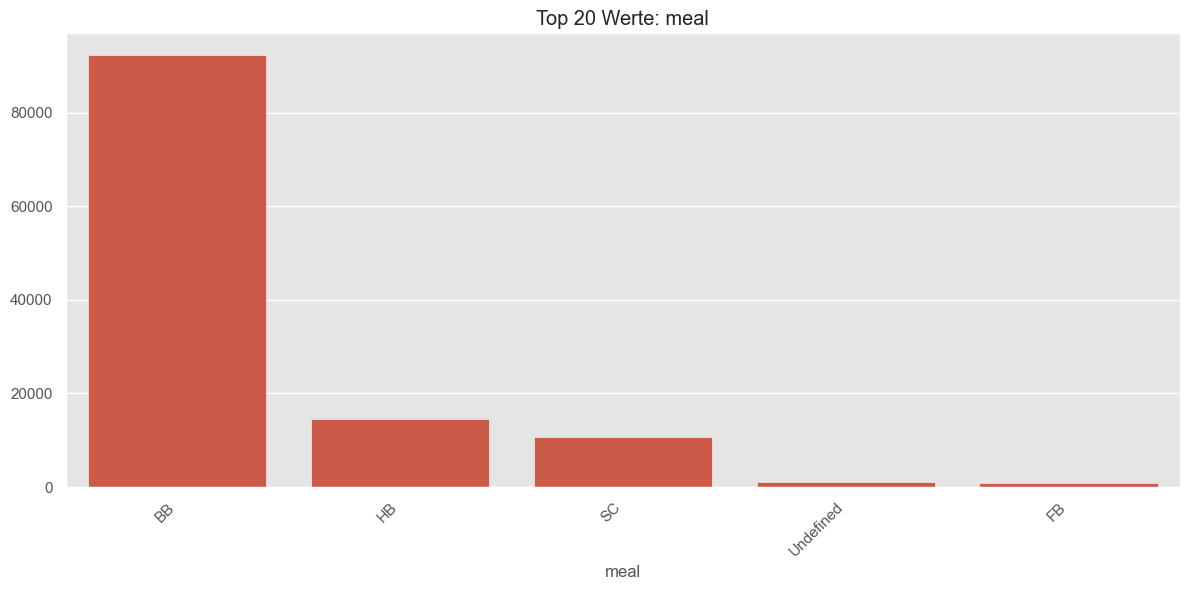

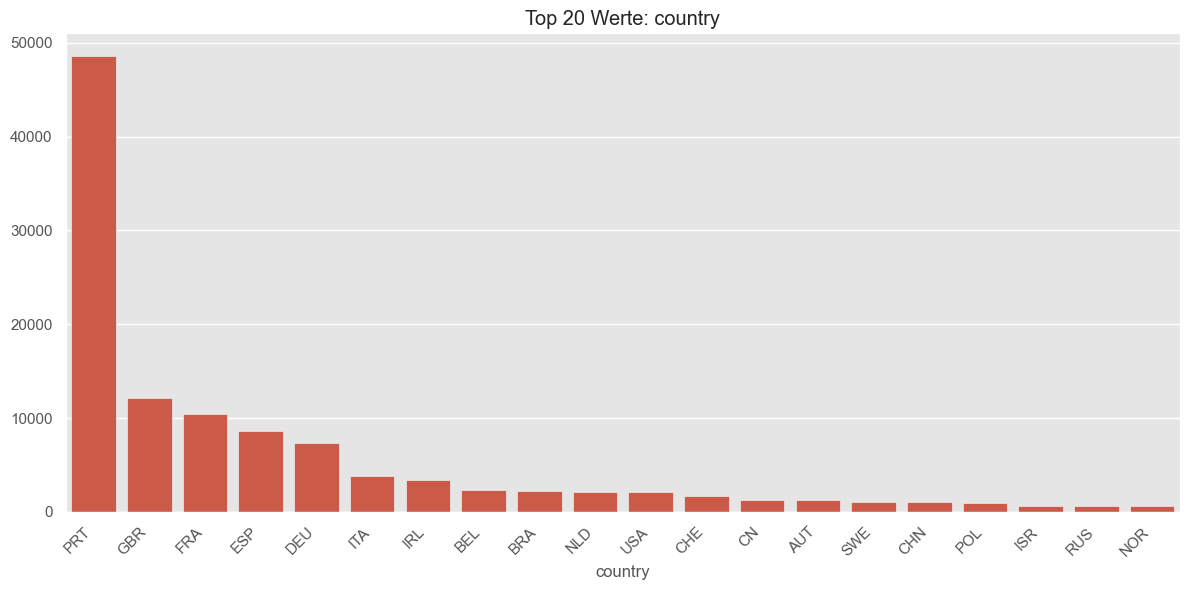

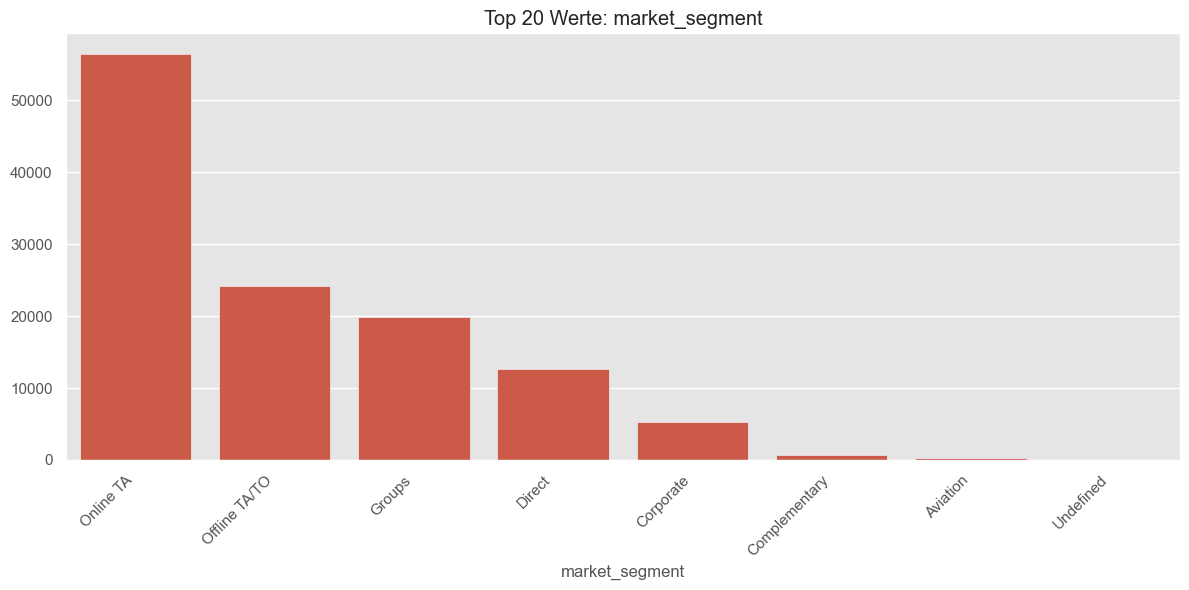

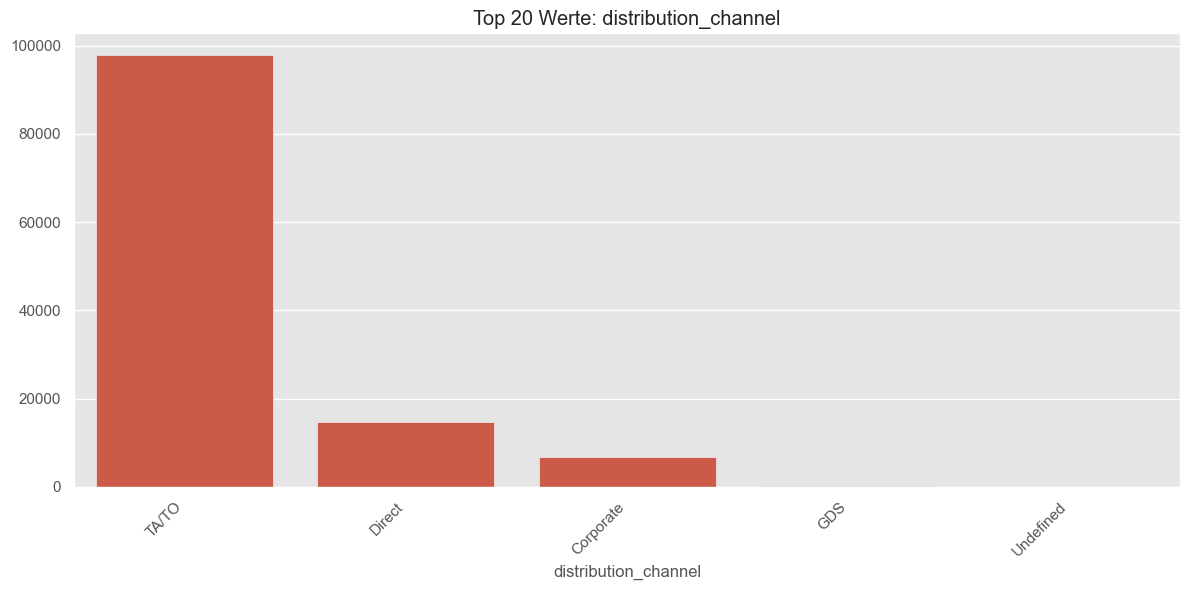

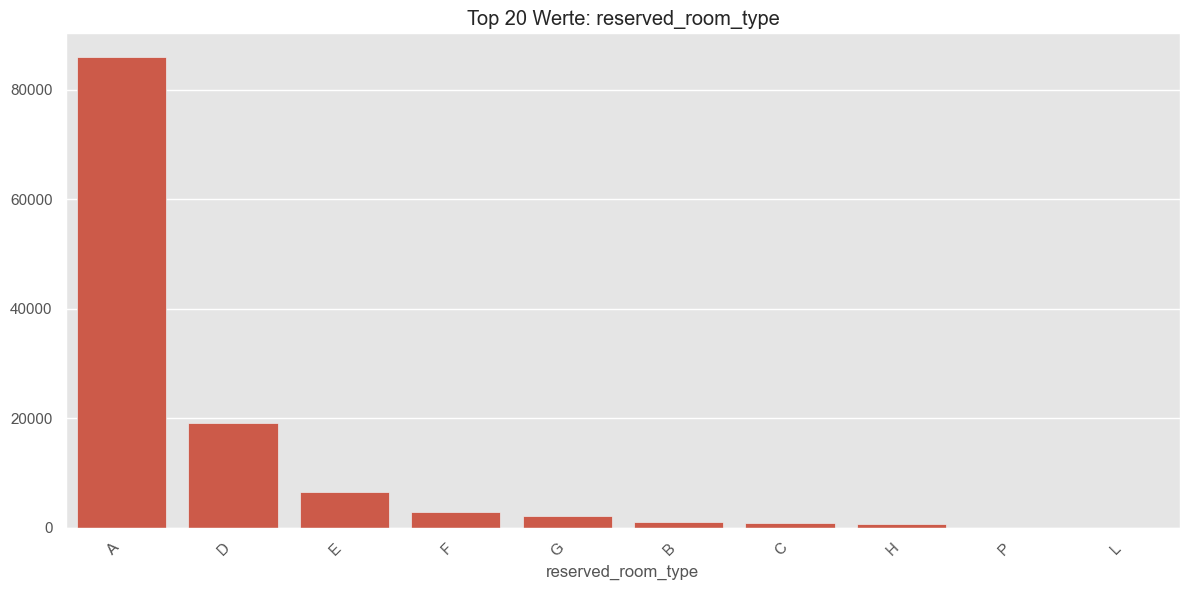

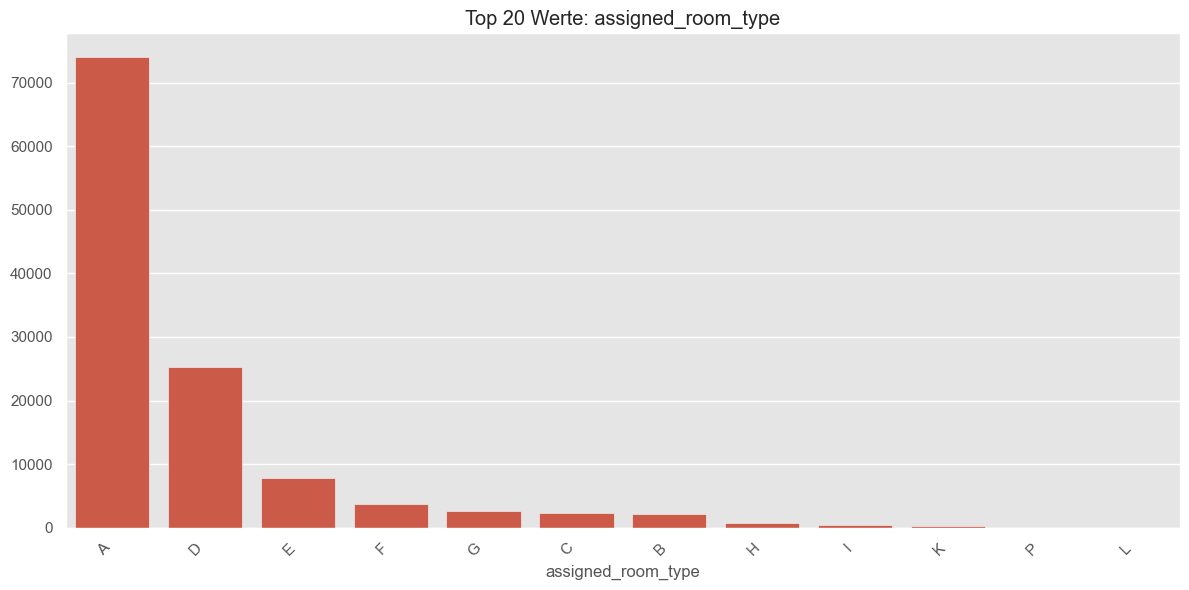

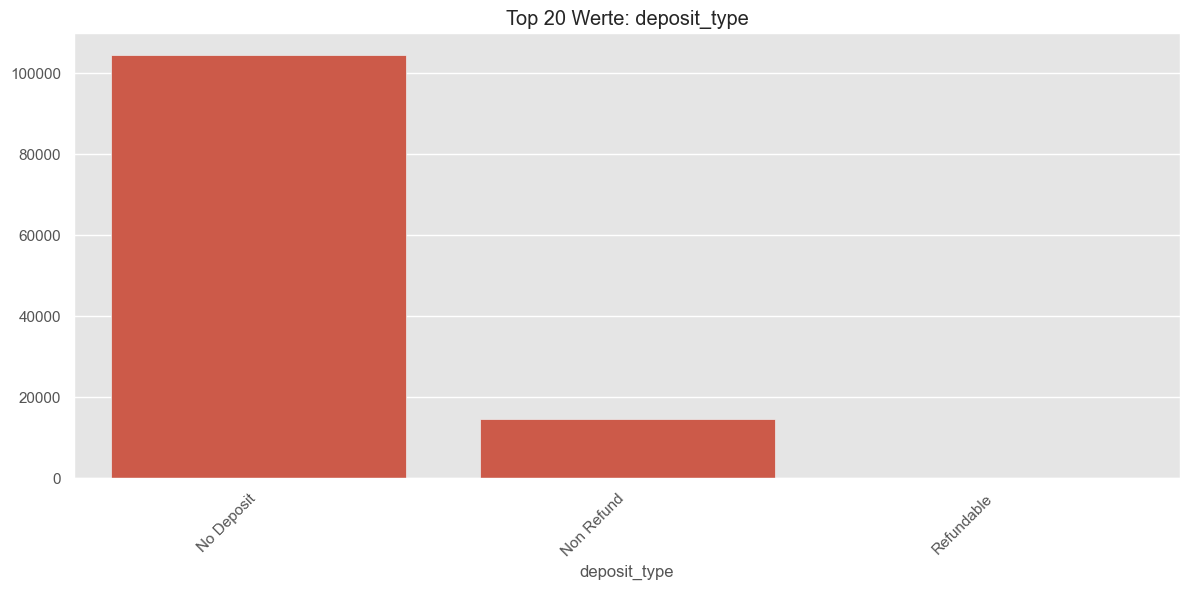

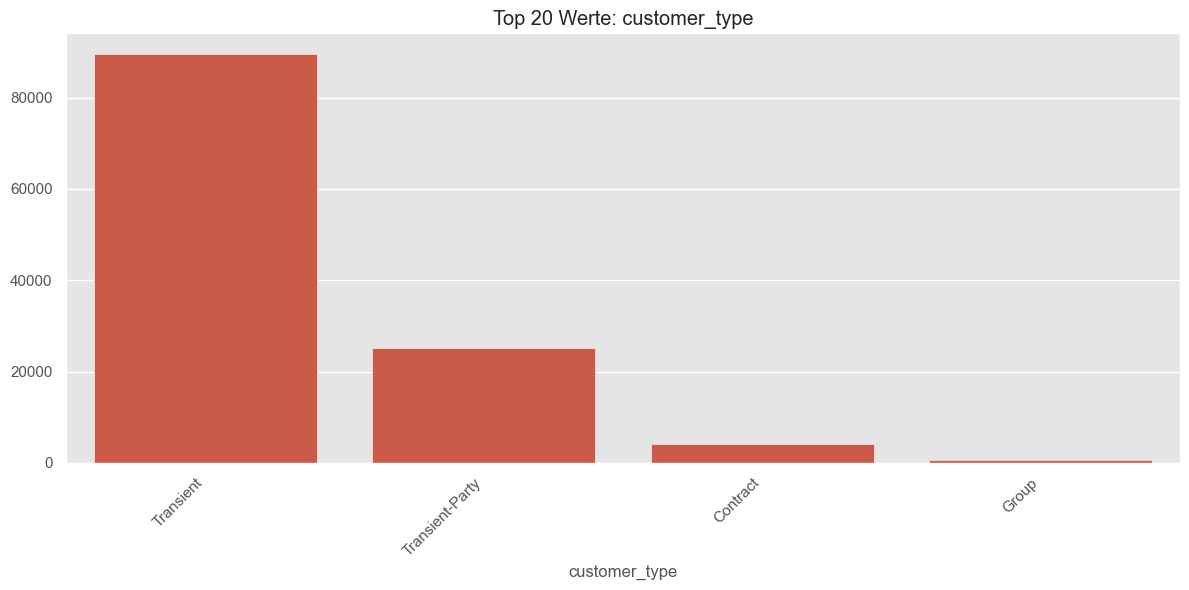

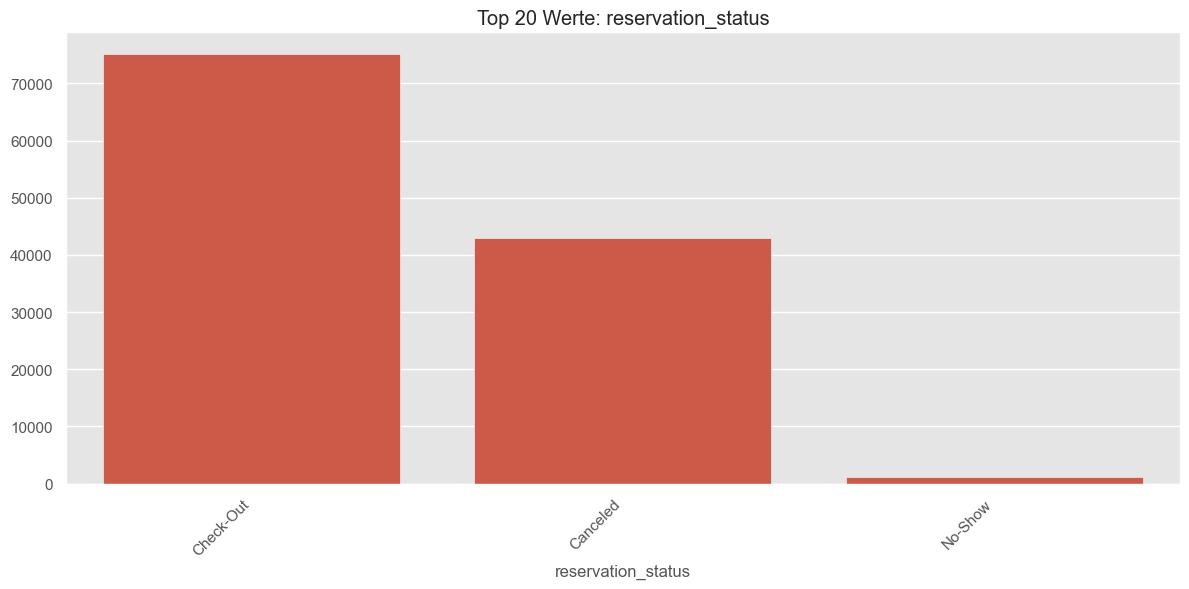

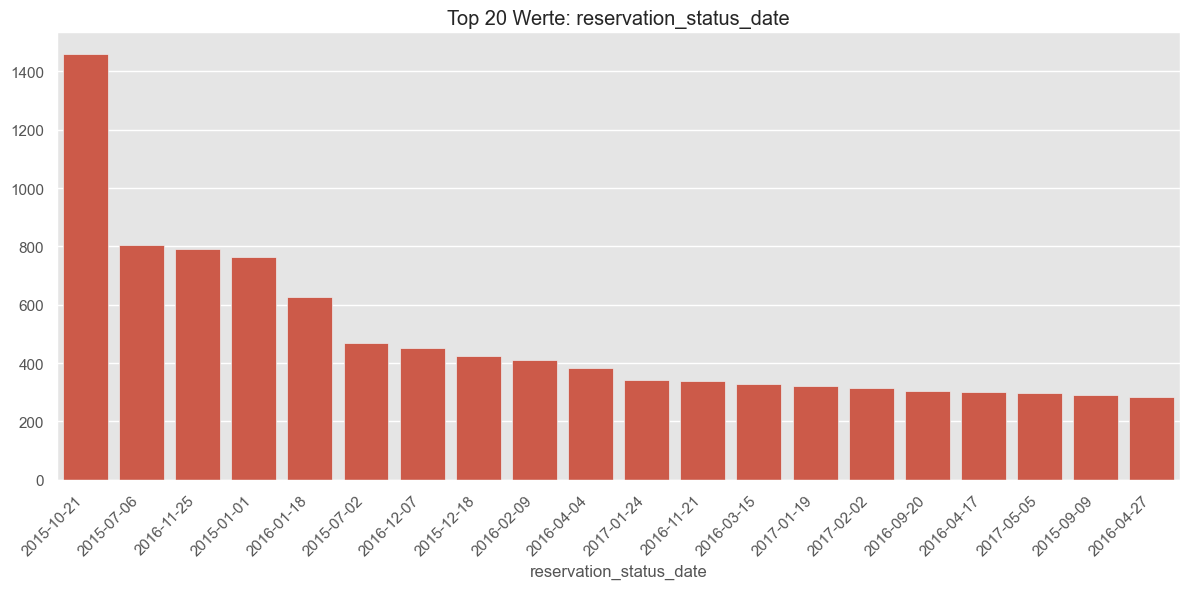

In [11]:
# Statistische Zusammenfassung für numerische Spalten
if len(numeric_columns) > 0:
    print("\nStatistische Zusammenfassung numerischer Spalten:")
    display(df[numeric_columns].describe().T)

# Häufigkeitsverteilungen für kategoriale Spalten
if len(categorical_columns) > 0:
    print("\nHäufigkeitsverteilungen kategorialer Spalten:")
    for col in categorical_columns:
        print(f"\n{col}:")
        display(df[col].value_counts().head(10))  # Top 10 häufigste Werte
        print(f"Anzahl eindeutiger Werte: {df[col].nunique()}")

# Histogramme und Dichteplots für numerische Variablen
if len(numeric_columns) > 0:
    rows = int(np.ceil(len(numeric_columns) / 3))
    plt.figure(figsize=(18, rows * 4))
    for i, column in enumerate(numeric_columns):
        plt.subplot(rows, 3, i+1)
        sns.histplot(df[column].dropna(), kde=True)
        plt.title(f'Verteilung: {column}')
    plt.tight_layout()
    plt.show()

# Box-Plots für numerische Variablen
if len(numeric_columns) > 0:
    rows = int(np.ceil(len(numeric_columns) / 3))
    plt.figure(figsize=(18, rows * 4))
    for i, column in enumerate(numeric_columns):
        plt.subplot(rows, 3, i+1)
        sns.boxplot(y=df[column].dropna())
        plt.title(f'Boxplot: {column}')
    plt.tight_layout()
    plt.show()

# Balkendiagramme für kategoriale Variablen
if len(categorical_columns) > 0:
    for col in categorical_columns:
        plt.figure(figsize=(12, 6))
        top_cats = df[col].value_counts().head(20)  # Top 20 Kategorien
        sns.barplot(x=top_cats.index, y=top_cats.values)
        plt.title(f'Top 20 Werte: {col}')
        plt.xticks(rotation=45, ha='right')
        plt.tight_layout()
        plt.show()

## 5. Ausreißeranalyse

Erläuterung: Hier identifizieren wir Ausreißer mit zwei verschiedenen Methoden: Z-Score und IQR-Methode.

In [54]:
z_scores = pd.DataFrame(index=df.index)  # Gleiche Zeilen wie df

for column in numeric_columns:
    # Daten der Spalte
    col_data = df[column]
    
    # a) Wenn keine NAs vorhanden sind, einfach den Z-Score berechnen
    if col_data.isnull().sum() == 0:
        z_scores[column] = np.abs(stats.zscore(col_data))
    
    # b) Wenn NAs vorhanden sind:
    else:
        # Nur die non-null-Werte extrahieren
        non_null_data = col_data.dropna()
        
        # Z-Score berechnen für nur diese Werte
        z = stats.zscore(non_null_data)
        
        # Als Series anlegen und den Index wie die non-null-Werte setzen
        z_series = pd.Series(z, index=non_null_data.index)
        
        # Anschließend in die entsprechende Spalte des z_scores-Datensatzes übernehmen
        # und für die NA-Positionen von df automatisch mit NaN auffüllen
        z_scores[column] = z_series

# Jetzt hast du ein DataFrame z_scores mit gleicher Zeilenlänge wie df, 
# in dem für jede numerische Spalte die Z-Scores stehen (NaN an den Stellen, an denen df[column] fehlte).

# Ausreißer identifizieren (|z| > 3)
print("Anzahl der Ausreißer pro numerischer Spalte (|z| > 3):")
display((z_scores > 3).sum())

# IQR-Methode bleibt unverändert
outliers_count = {}
for column in numeric_columns:
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    outliers = ((df[column] < (Q1 - 1.5 * IQR)) | (df[column] > (Q3 + 1.5 * IQR))).sum()
    outliers_count[column] = outliers

print("\nAnzahl der Ausreißer pro Spalte (IQR-Methode):")
display(pd.Series(outliers_count))

Anzahl der Ausreißer pro numerischer Spalte (|z| > 3):


is_canceled                          0
lead_time                         1454
arrival_date_year                    0
arrival_date_week_number             0
arrival_date_day_of_month            0
stays_in_weekend_nights           2199
stays_in_week_nights              1669
adults                             481
children                          3729
babies                             917
is_repeated_guest                 3810
previous_cancellations             317
previous_bookings_not_canceled     936
booking_changes                   1570
agent                              797
company                              0
days_in_waiting_list              1871
adr                               1138
required_car_parking_spaces       7416
total_of_special_requests         2877
dtype: int64


Anzahl der Ausreißer pro Spalte (IQR-Methode):


is_canceled                           0
lead_time                          3005
arrival_date_year                     0
arrival_date_week_number              0
arrival_date_day_of_month             0
stays_in_weekend_nights             265
stays_in_week_nights               3354
adults                            29710
children                           8590
babies                              917
is_repeated_guest                  3810
previous_cancellations             6484
previous_bookings_not_canceled     3620
booking_changes                   18076
agent                                 0
company                               0
days_in_waiting_list               3698
adr                                3793
required_car_parking_spaces        7416
total_of_special_requests          2877
dtype: int64

## 6. Bivariate Analyse - Mit Berücksichtigung verschiedener Datentypen

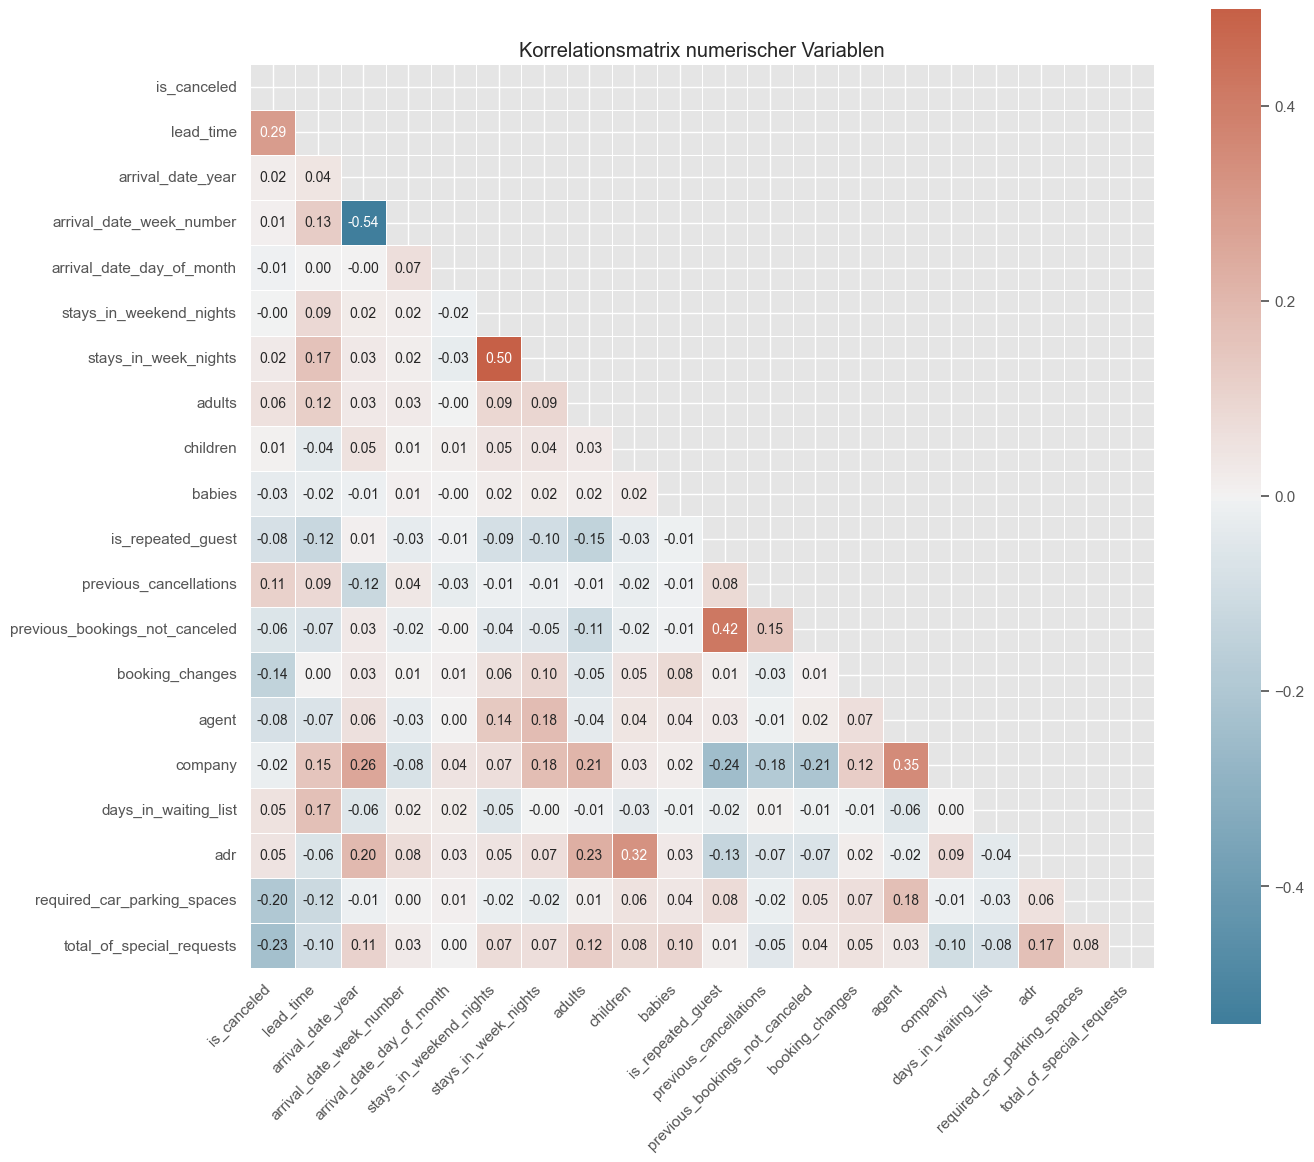

Top 10 stärkste Korrelationen:


arrival_date_week_number        arrival_date_year                 0.540561
arrival_date_year               arrival_date_week_number          0.540561
stays_in_weekend_nights         stays_in_week_nights              0.498969
stays_in_week_nights            stays_in_weekend_nights           0.498969
is_repeated_guest               previous_bookings_not_canceled    0.418056
previous_bookings_not_canceled  is_repeated_guest                 0.418056
agent                           company                           0.350746
company                         agent                             0.350746
children                        adr                               0.324854
adr                             children                          0.324854
dtype: float64

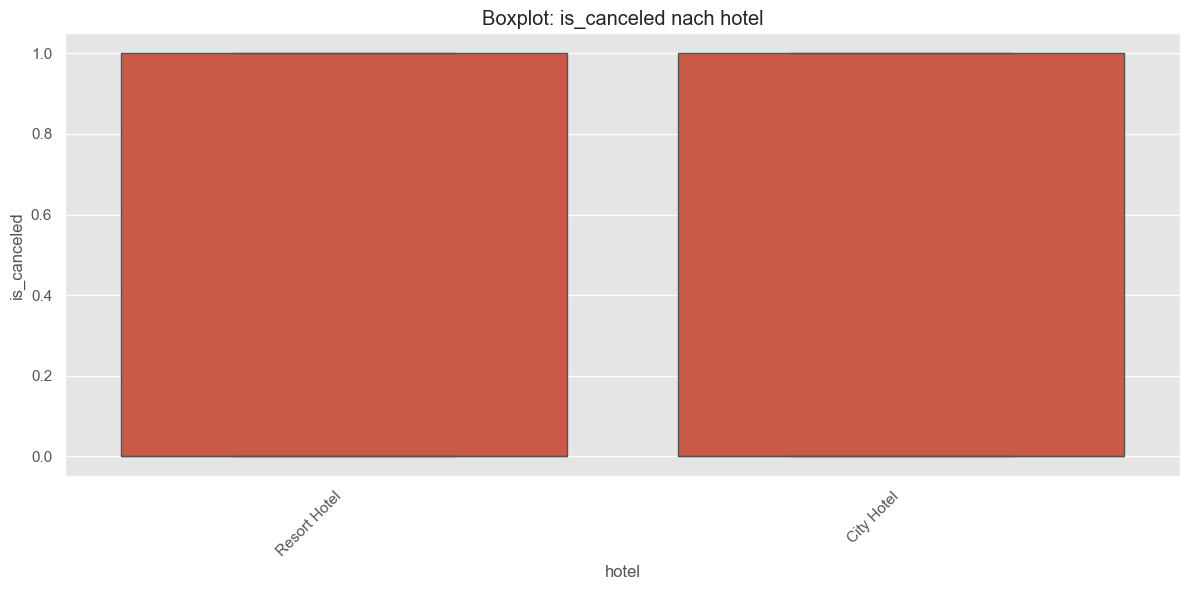

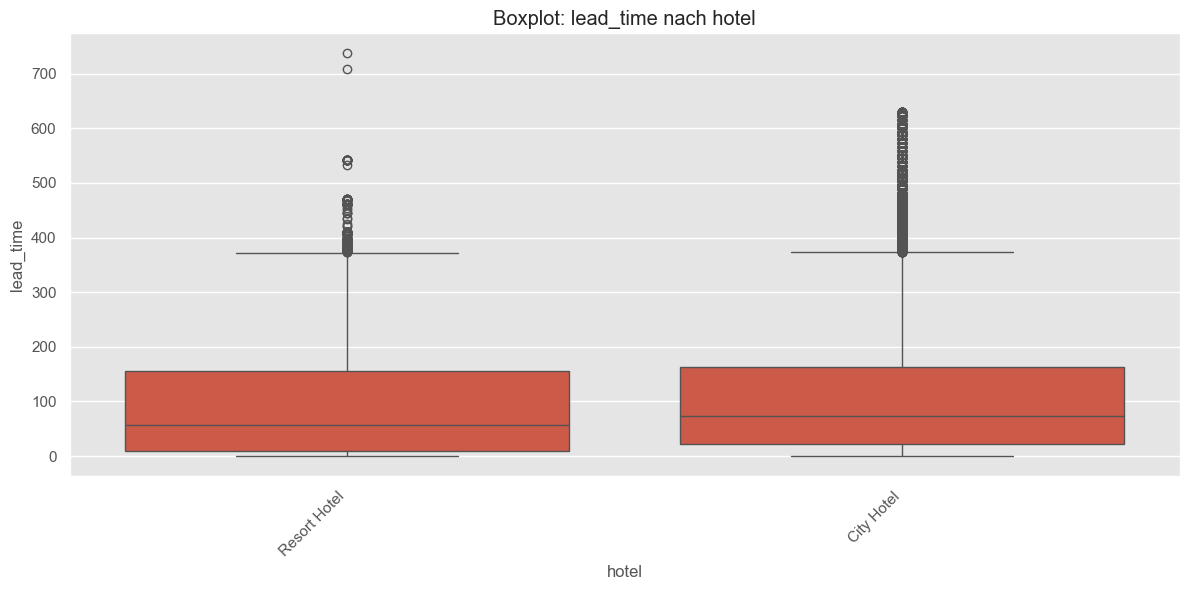

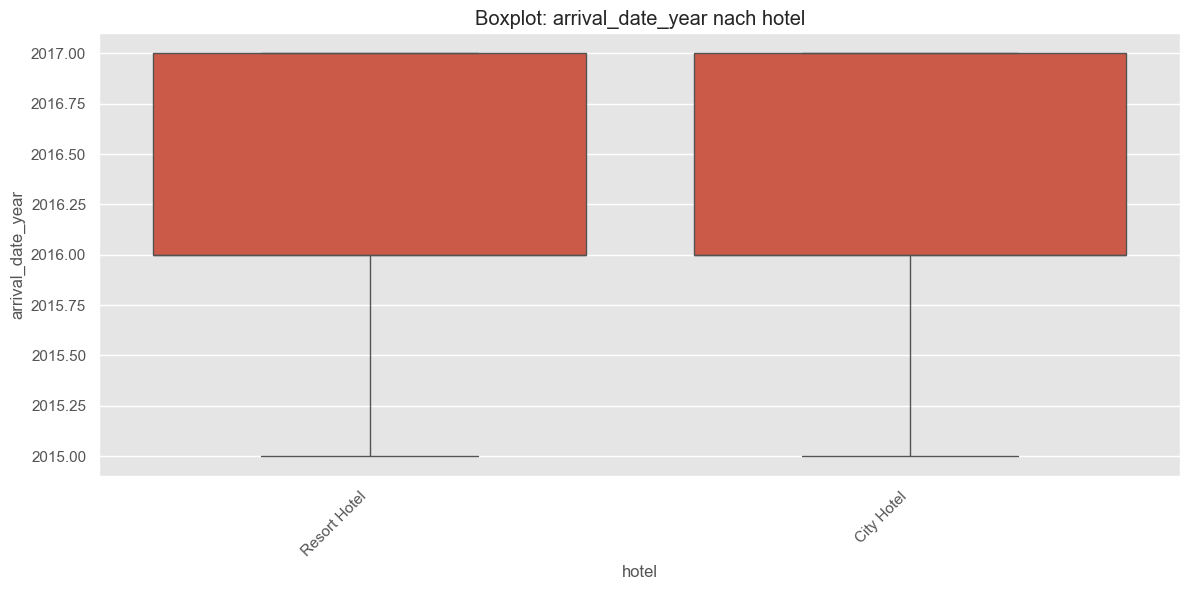

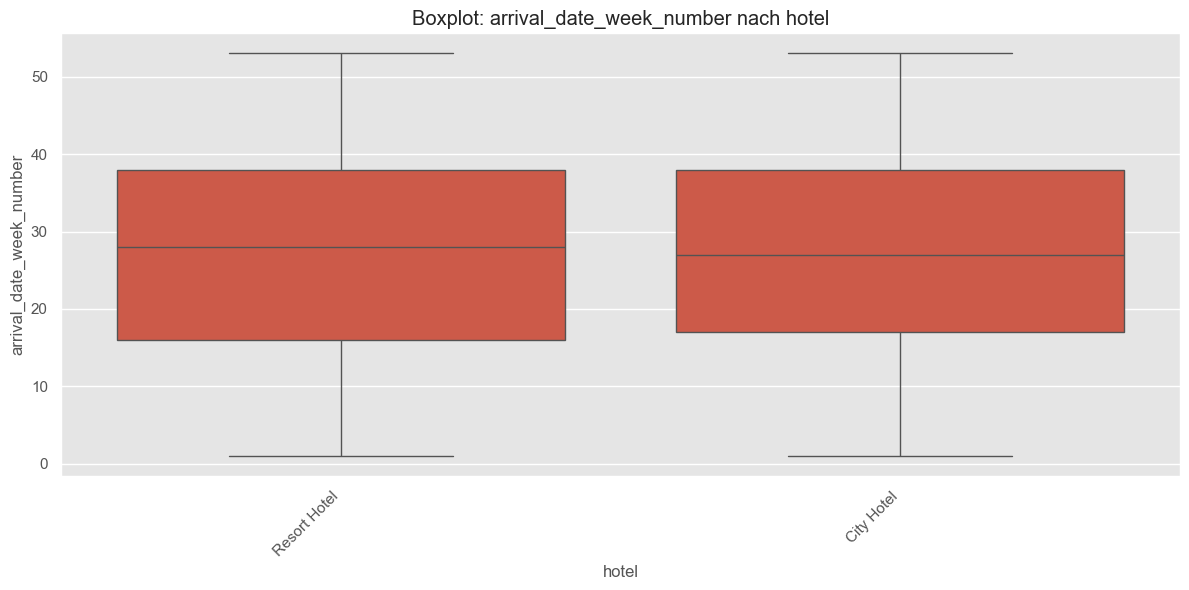

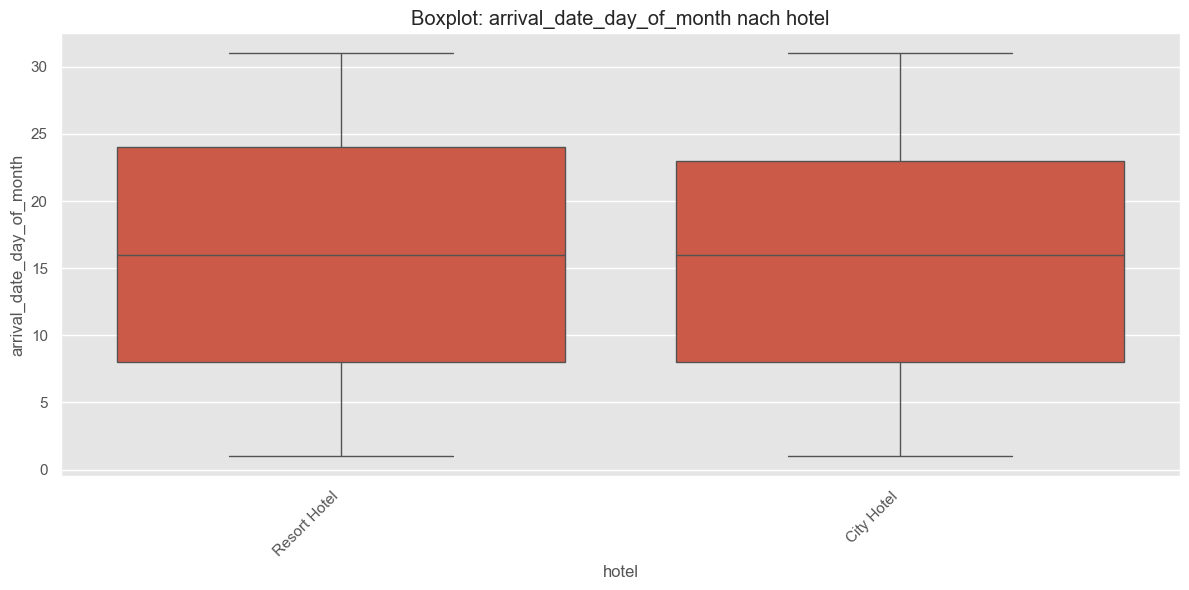

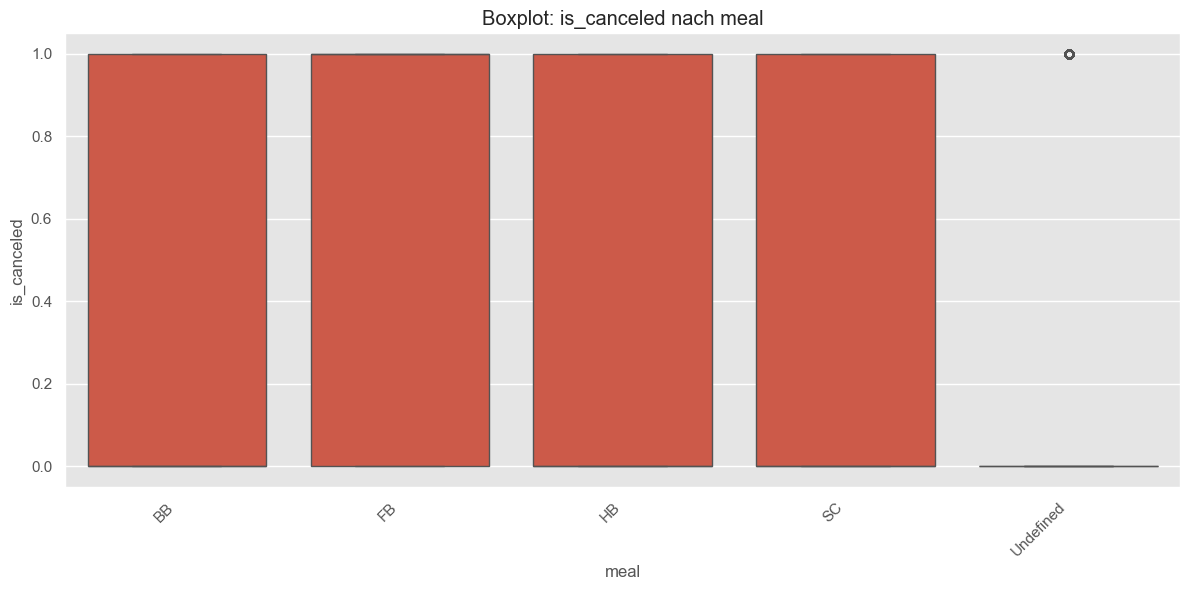

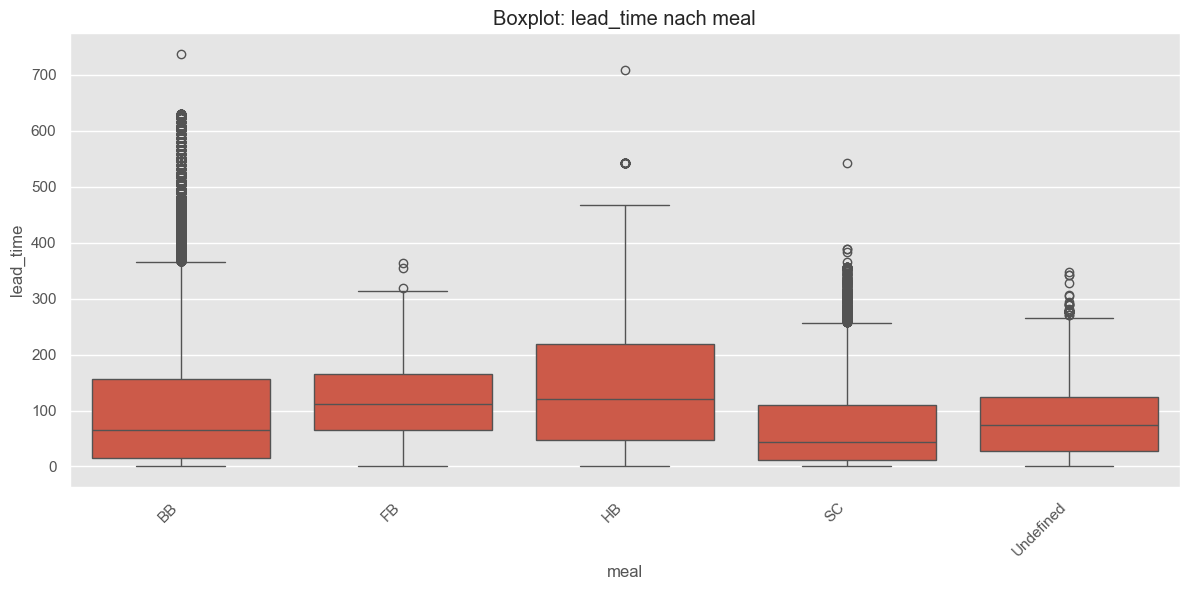

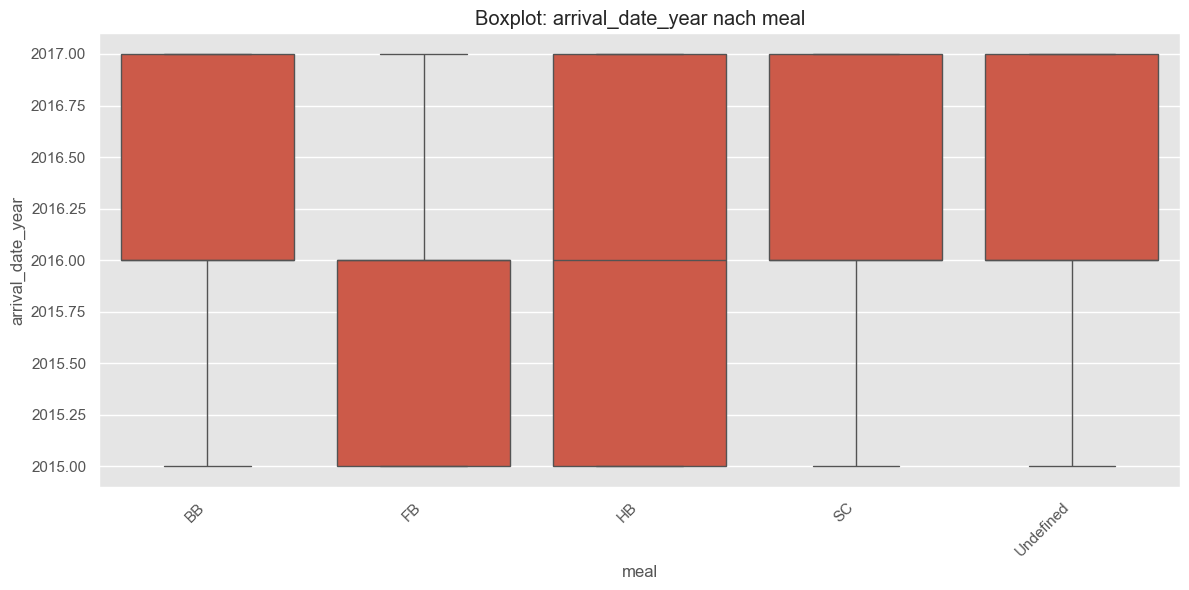

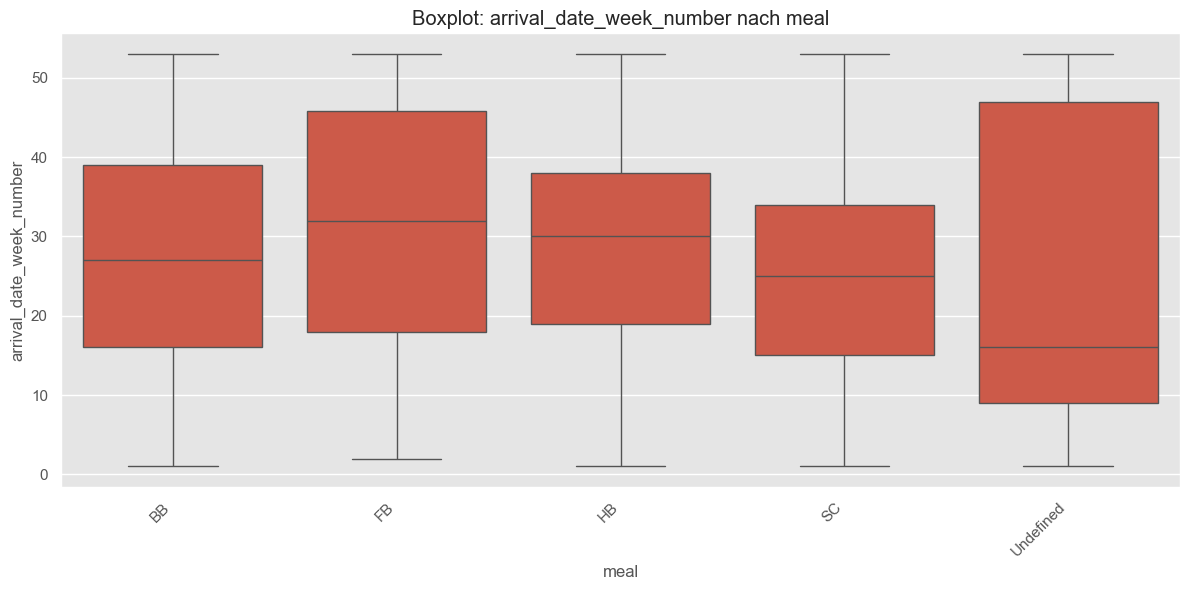

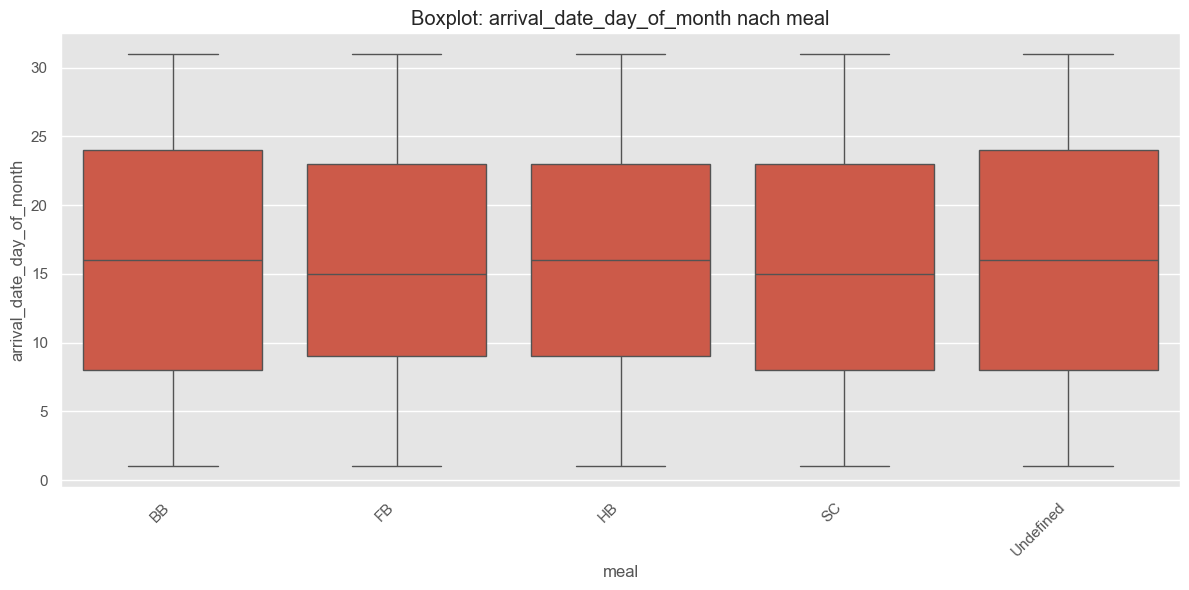

In [12]:
# Korrelation zwischen numerischen Variablen (mit berücksichtigung fehlender Werte)
if len(numeric_columns) >= 2:
    # Korrelationsmatrix mit paarweisem Ausschluss fehlender Werte
    corr_matrix = df[numeric_columns].corr(method='pearson', min_periods=1)
    
    plt.figure(figsize=(14, 12))
    mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
    cmap = sns.diverging_palette(230, 20, as_cmap=True)
    sns.heatmap(corr_matrix, mask=mask, cmap=cmap, annot=True, fmt='.2f', 
                square=True, linewidths=.5, center=0)
    plt.title('Korrelationsmatrix numerischer Variablen')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()
    
    # Top 10 stärkste Korrelationen
    corr_pairs = corr_matrix.unstack()
    corr_pairs = corr_pairs[corr_pairs < 1.0]  # Selbstkorrelationen ausschließen
    high_corr = corr_pairs.abs().sort_values(ascending=False).head(10)
    print("Top 10 stärkste Korrelationen:")
    display(high_corr)

# Analyse kategorischer vs. numerischer Variablen
if len(categorical_columns) > 0 and len(numeric_columns) > 0:
    # Für jede Kombination aus kategorischer und numerischer Variable
    for cat_col in categorical_columns[:3]:  # Begrenzen auf die ersten 3 kategorialen Spalten
        unique_cats = df[cat_col].nunique()
        if unique_cats < 10:  # Nur für kategoriale Spalten mit wenigen eindeutigen Werten
            for num_col in numeric_columns[:5]:  # Begrenzen auf die ersten 5 numerischen Spalten
                plt.figure(figsize=(12, 6))
                sns.boxplot(x=cat_col, y=num_col, data=df)
                plt.title(f'Boxplot: {num_col} nach {cat_col}')
                plt.xticks(rotation=45, ha='right')
                plt.tight_layout()
                plt.show()

# Analyse zwischen kategorischen Variablen
if len(categorical_columns) >= 2:
    # Für ausgewählte Paare kategorialer Variablen
    for i, cat_col1 in enumerate(categorical_columns[:2]):  # Erste 2 kategoriale Spalten
        for cat_col2 in categorical_columns[i+1:i+2]:  # Die nächste kategoriale Spalte
            if df[cat_col1].nunique() < 10 and df[cat_col2].nunique() < 10:
                plt.figure(figsize=(12, 8))
                ct = pd.crosstab(df[cat_col1], df[cat_col2], normalize='index')
                sns.heatmap(ct, annot=True, fmt='.2f', cmap='viridis')
                plt.title(f'Kreuztabelle: {cat_col1} vs {cat_col2}')
                plt.tight_layout()
                plt.show()

## 7. Behandlung fehlender Werte

In [53]:
# wir entfernen die Spalten 'agent' und 'company' aus dem Datensatz
df_both_populated = df[df["company"].notna() & df["agent"].notna()]
print(df_both_populated.shape)

(217, 33)


In [59]:
from sklearn.impute import SimpleImputer

# Verschmelzen der Spalten 'company' und 'agent' zu einer neuen Spalte 'company_agent'
df['company_agent'] = df['company'].fillna(df['agent']).fillna('99999')
df.drop(['company', 'agent'], axis=1, inplace=True)
# Imputation für 'children' und 'country'

# Imputer für numerische Spalten (children)
imputer_num = SimpleImputer(strategy='median')
df['children'] = imputer_num.fit_transform(df[['children']])

# Imputer für kategoriale Spalten (country)
imputer_cat = SimpleImputer(strategy='most_frequent')
# Korrigierte Version - wir konvertieren das 2D-Ergebnis zurück zu 1D mit ravel()
df['country'] = imputer_cat.fit_transform(df[['country']]).ravel()

# Überprüfen der Änderungen
print("Erste 5 Zeilen nach der Imputation und Verschmelzung:")
display(df.head())

Erste 5 Zeilen nach der Imputation und Verschmelzung:


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,company_agent
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,3,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01,99999
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,4,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01,99999
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02,99999
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02,304.0
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,0,No Deposit,0,Transient,98.0,0,1,Check-Out,2015-07-03,240.0


## 8. Weitere Analysen und Transformationen

In [56]:
# Analyse der Schiefe und Verteilungsformen numerischer Variablen
if len(numeric_columns) > 0:
    skewness = df[numeric_columns].skew().sort_values(ascending=False)
    kurtosis = df[numeric_columns].kurtosis().sort_values(ascending=False)
    
    distribution_stats = pd.DataFrame({
        'Schiefe': skewness,
        'Kurtosis': kurtosis
    })
    
    print("Verteilungsstatistiken (sortiert nach Schiefe):")
    display(distribution_stats)
    
    # Variablen mit starker Schiefe identifizieren
    high_skew = skewness[abs(skewness) > 1]
    if len(high_skew) > 0:
        print("\nVariablen mit starker Schiefe (|skew| > 1):")
        display(high_skew)
        
        # Log-Transformation für stark schiefe Variablen ze# Analyse der Schiefe und Verteilungsformen numerischer Variablen
if len(numeric_columns) > 0:
    skewness = df[numeric_columns].skew().sort_values(ascending=False)
    kurtosis = df[numeric_columns].kurtosis().sort_values(ascending=False)
    
    distribution_stats = pd.DataFrame({
        'Schiefe': skewness,
        'Kurtosis': kurtosis
    })
    
    print("Verteilungsstatistiken (sortiert nach Schiefe):")
    display(distribution_stats)
    
    # Variablen mit starker Schiefe identifizieren
    high_skew = skewness[abs(skewness) > 1]
    if len(high_skew) > 0:
        print("\nVariablen mit starker Schiefe (|skew| > 1):")
        display(high_skew)
        
        # Log-Transformation für stark schiefe Variablen ze

Verteilungsstatistiken (sortiert nach Schiefe):


,Schiefe,Kurtosis
adr,10.530214,1013.189851
adults,18.317805,1352.115116
agent,1.089386,-0.007180
arrival_date_day_of_month,-0.002000,-1.187168
arrival_date_week_number,-0.010014,-0.986077
arrival_date_year,-0.232583,-0.994564
babies,24.646545,1633.948235
booking_changes,6.000270,79.393605
children,4.112670,18.674464
company,0.601600,-0.490795



Variablen mit starker Schiefe (|skew| > 1):


babies                            24.646545
previous_cancellations            24.458049
previous_bookings_not_canceled    23.539800
adults                            18.317805
days_in_waiting_list              11.944353
adr                               10.530214
booking_changes                    6.000270
is_repeated_guest                  5.326315
required_car_parking_spaces        4.163233
children                           4.112670
stays_in_week_nights               2.862249
stays_in_weekend_nights            1.380046
total_of_special_requests          1.349189
lead_time                          1.346550
agent                              1.089386
dtype: float64

Verteilungsstatistiken (sortiert nach Schiefe):


,Schiefe,Kurtosis
adr,10.530214,1013.189851
adults,18.317805,1352.115116
agent,1.089386,-0.007180
arrival_date_day_of_month,-0.002000,-1.187168
arrival_date_week_number,-0.010014,-0.986077
arrival_date_year,-0.232583,-0.994564
babies,24.646545,1633.948235
booking_changes,6.000270,79.393605
children,4.112670,18.674464
company,0.601600,-0.490795



Variablen mit starker Schiefe (|skew| > 1):


babies                            24.646545
previous_cancellations            24.458049
previous_bookings_not_canceled    23.539800
adults                            18.317805
days_in_waiting_list              11.944353
adr                               10.530214
booking_changes                    6.000270
is_repeated_guest                  5.326315
required_car_parking_spaces        4.163233
children                           4.112670
stays_in_week_nights               2.862249
stays_in_weekend_nights            1.380046
total_of_special_requests          1.349189
lead_time                          1.346550
agent                              1.089386
dtype: float64

In [ ]:

from pathlib import Path

home_dir = Path.home()
output_file = home_dir / "Users/tobiaswachtel/Documents/GitHub/Data_Mining_WB_DBU//hotel_bookings_processed.csv"
df.to_csv(output_file, index=False)
print("Data has been saved to {output_file}")

NameError: name 'df_raw' is not defined